# EDA FIFA Python Script

Source : https://www.kaggle.com/datasets/winterbreeze/fifa19eda <br>
Below script involves Exploratory Data Analysis (EDA) of the FIFA 19 dataset: Examining and summarizing the main characteristics of a dataset. <br>

In [121]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

In [122]:
df=pd.read_csv("fifa_eda.csv") #Import the data
df.head()


ID               Name  Age Nationality  Overall  Potential  \
0  158023           L. Messi   31   Argentina       94         94   
1   20801  Cristiano Ronaldo   33    Portugal       94         94   
2  190871          Neymar Jr   26      Brazil       92         93   
3  193080             De Gea   27       Spain       91         93   
4  192985       K. De Bruyne   27     Belgium       91         92   

                  Club     Value   Wage Preferred Foot  \
0         FC Barcelona  110500.0  565.0           Left   
1             Juventus   77000.0  405.0          Right   
2  Paris Saint-Germain  118500.0  290.0          Right   
3    Manchester United   72000.0  260.0          Right   
4      Manchester City  102000.0  355.0          Right   

   International Reputation  Skill Moves Position  Joined  \
0                       5.0          4.0       RF    2004   
1                       5.0          5.0       ST    2018   
2                       5.0          5.0       LW    2017   
3                       4.0          1.0       GK    2011   
4                       4.0          4.0      RCM    2015   

  Contract Valid Until    Height  Weight  Release Clause  
0           2021-01-01  5.583333   159.0        226500.0  
1           2022-01-01  6.166667   183.0        127100.0  
2           2022-01-01  5.750000   150.0        228100.0  
3           2020-01-01  6.333333   168.0        138600.0  
4           2023-01-01  5.916667   154.0        196400.0

Analyzing the data type for each feature. <br>
If needed, convert data into appropriate data types if that is not already the case.<br> 
For Data exploration and visualization, categorical values should have “category” data type.

In [123]:
df.dtypes

ID                            int64
Name                         object
Age                           int64
Nationality                  object
Overall                       int64
Potential                     int64
Club                         object
Value                       float64
Wage                        float64
Preferred Foot               object
International Reputation    float64
Skill Moves                 float64
Position                     object
Joined                        int64
Contract Valid Until         object
Height                      float64
Weight                      float64
Release Clause              float64
dtype: object

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Nationality               18207 non-null  object 
 4   Overall                   18207 non-null  int64  
 5   Potential                 18207 non-null  int64  
 6   Club                      17966 non-null  object 
 7   Value                     17955 non-null  float64
 8   Wage                      18207 non-null  float64
 9   Preferred Foot            18207 non-null  object 
 10  International Reputation  18159 non-null  float64
 11  Skill Moves               18159 non-null  float64
 12  Position                  18207 non-null  object 
 13  Joined                    18207 non-null  int64  
 14  Contra

In [125]:
df = df.convert_dtypes() # convert columns to best possible dtypes using dtypes supporting pd.NA

In [126]:
df.nunique(axis=0) #No. of unique values for each columns

ID                          18207
Name                        17194
Age                            29
Nationality                   164
Overall                        48
Potential                      47
Club                          651
Value                         216
Wage                          144
Preferred Foot                  2
International Reputation        5
Skill Moves                     5
Position                       27
Joined                         22
Contract Valid Until           35
Height                         22
Weight                         58
Release Clause               1245
dtype: int64

Missing Values: <br>
Identify the columns that have missing values in this dataset.  <br>
Count of  rows have missing values in all these columns <br>
Decide on a strategy to address missing values in each of the columns (MCAR, MAR, MNAR)

In [127]:
# Identify the columns that have missing values in this dataset. 
df.isnull().sum() # count the missing values in each columns

ID                            0
Name                          0
Age                           0
Nationality                   0
Overall                       0
Potential                     0
Club                        241
Value                       252
Wage                          0
Preferred Foot                0
International Reputation     48
Skill Moves                  48
Position                      0
Joined                        0
Contract Valid Until        289
Height                        0
Weight                        0
Release Clause                0
dtype: int64

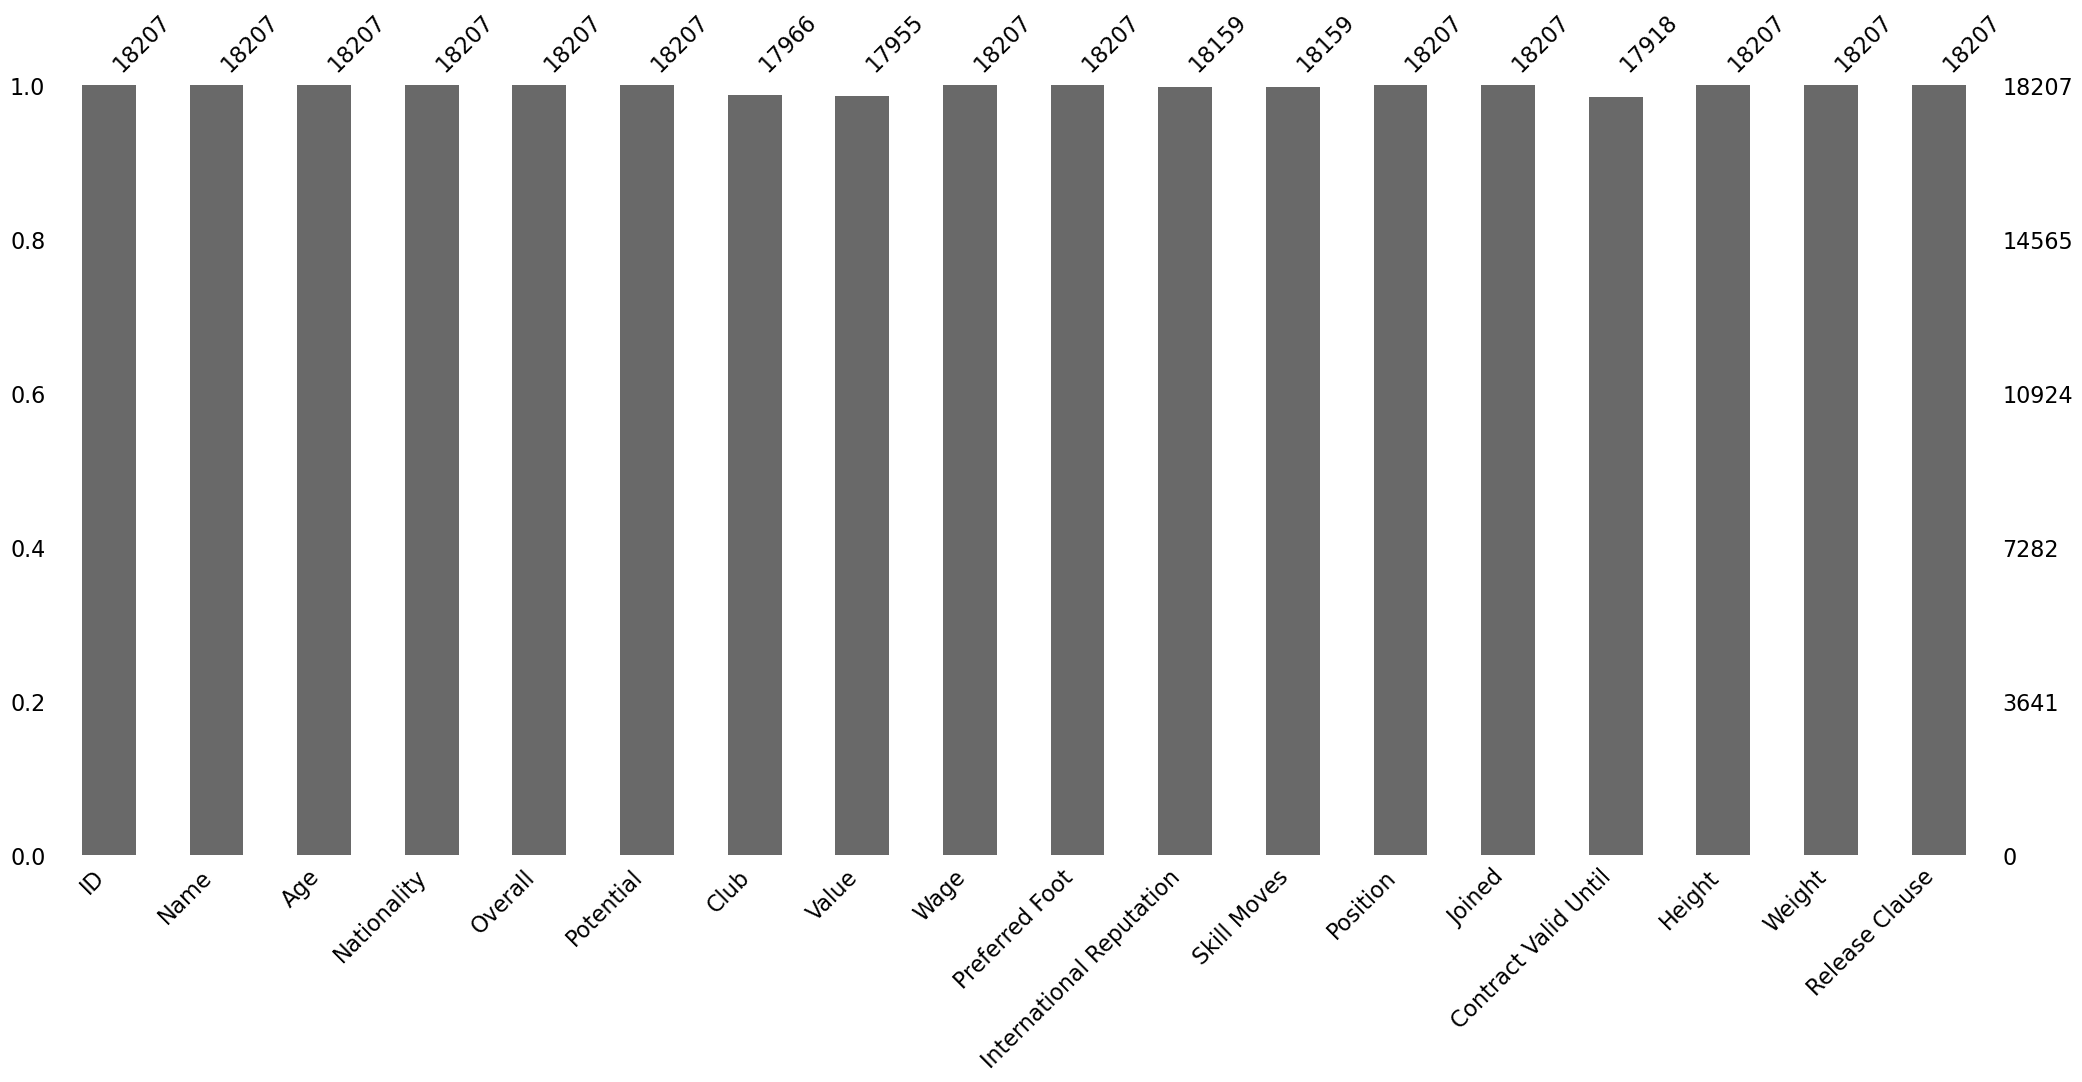

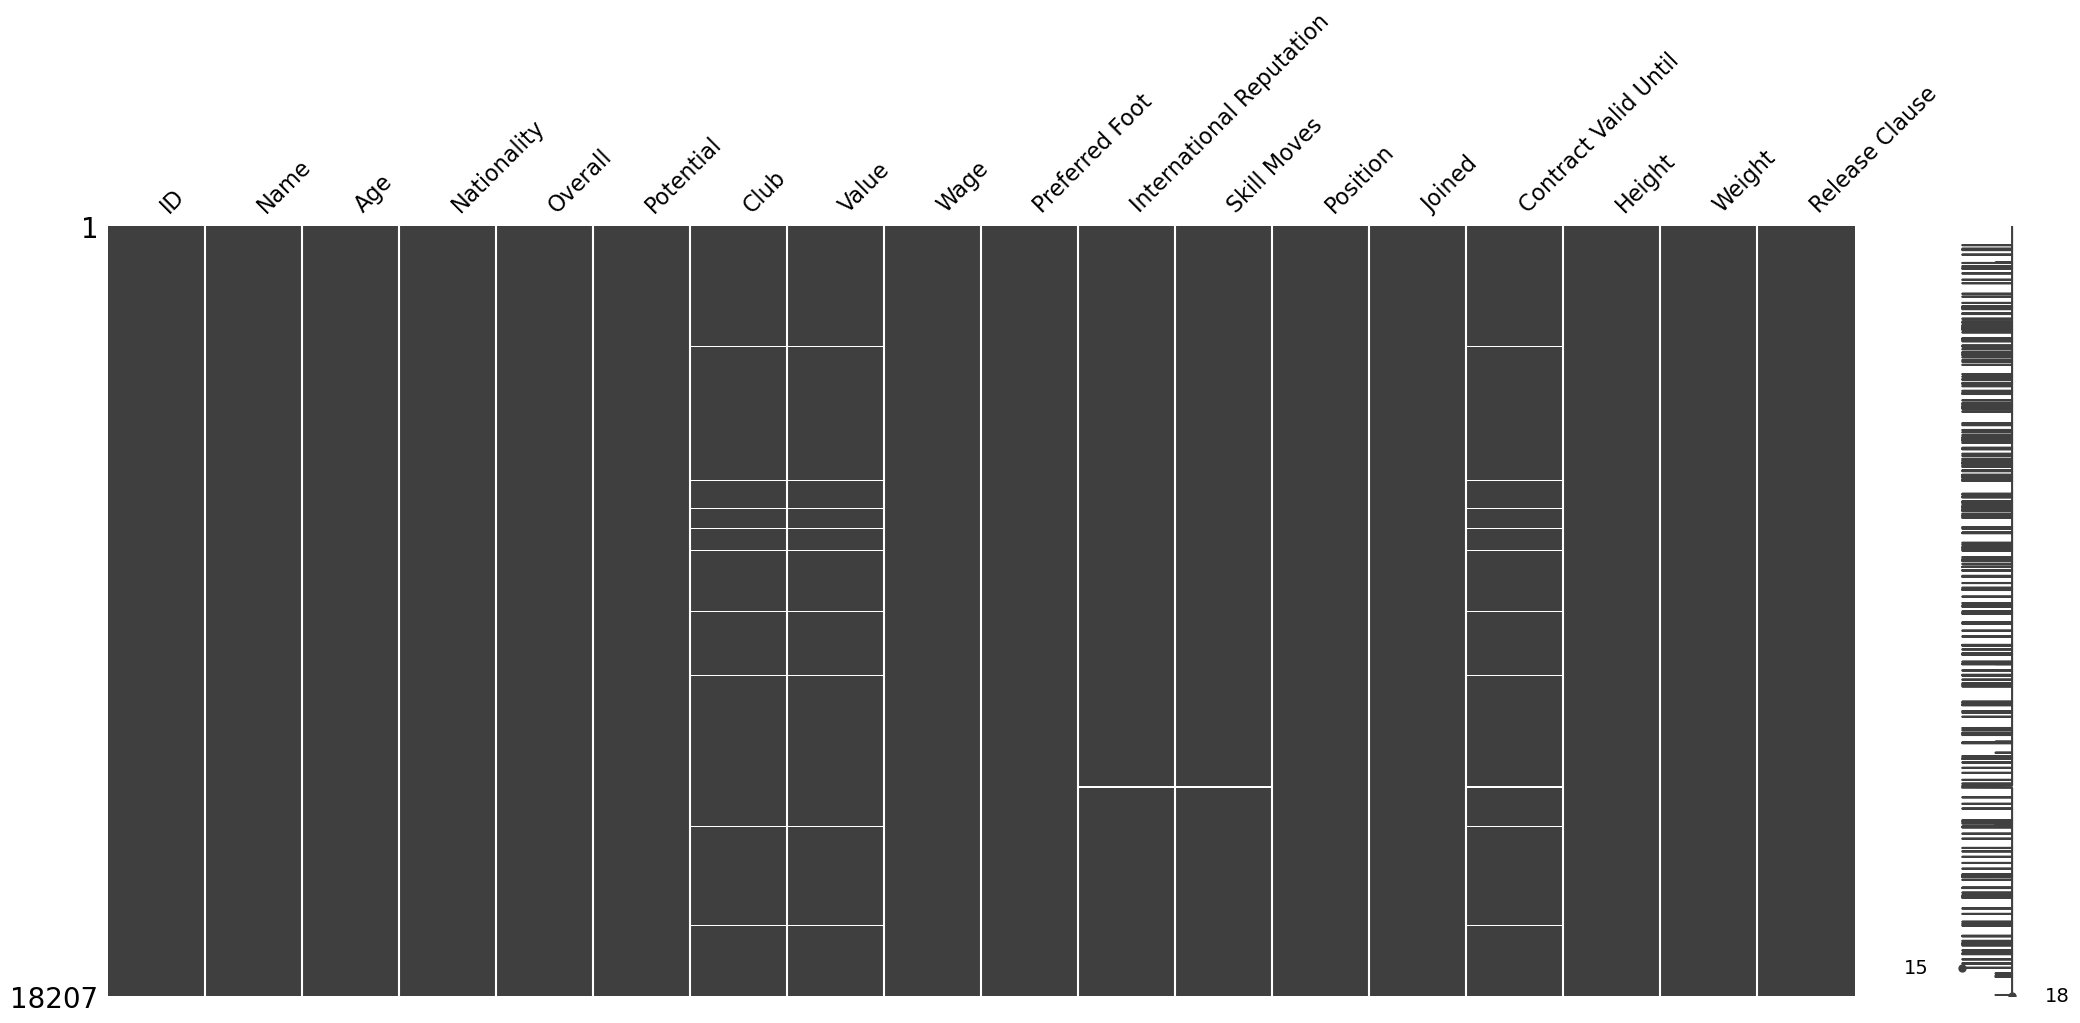

In [128]:
import missingno as msno
import matplotlib.pyplot as plt
msno.bar(df) #Bargraph showing the completeness of the data
msno.matrix(df) #matrix
plt.show()

Column being sorted ID


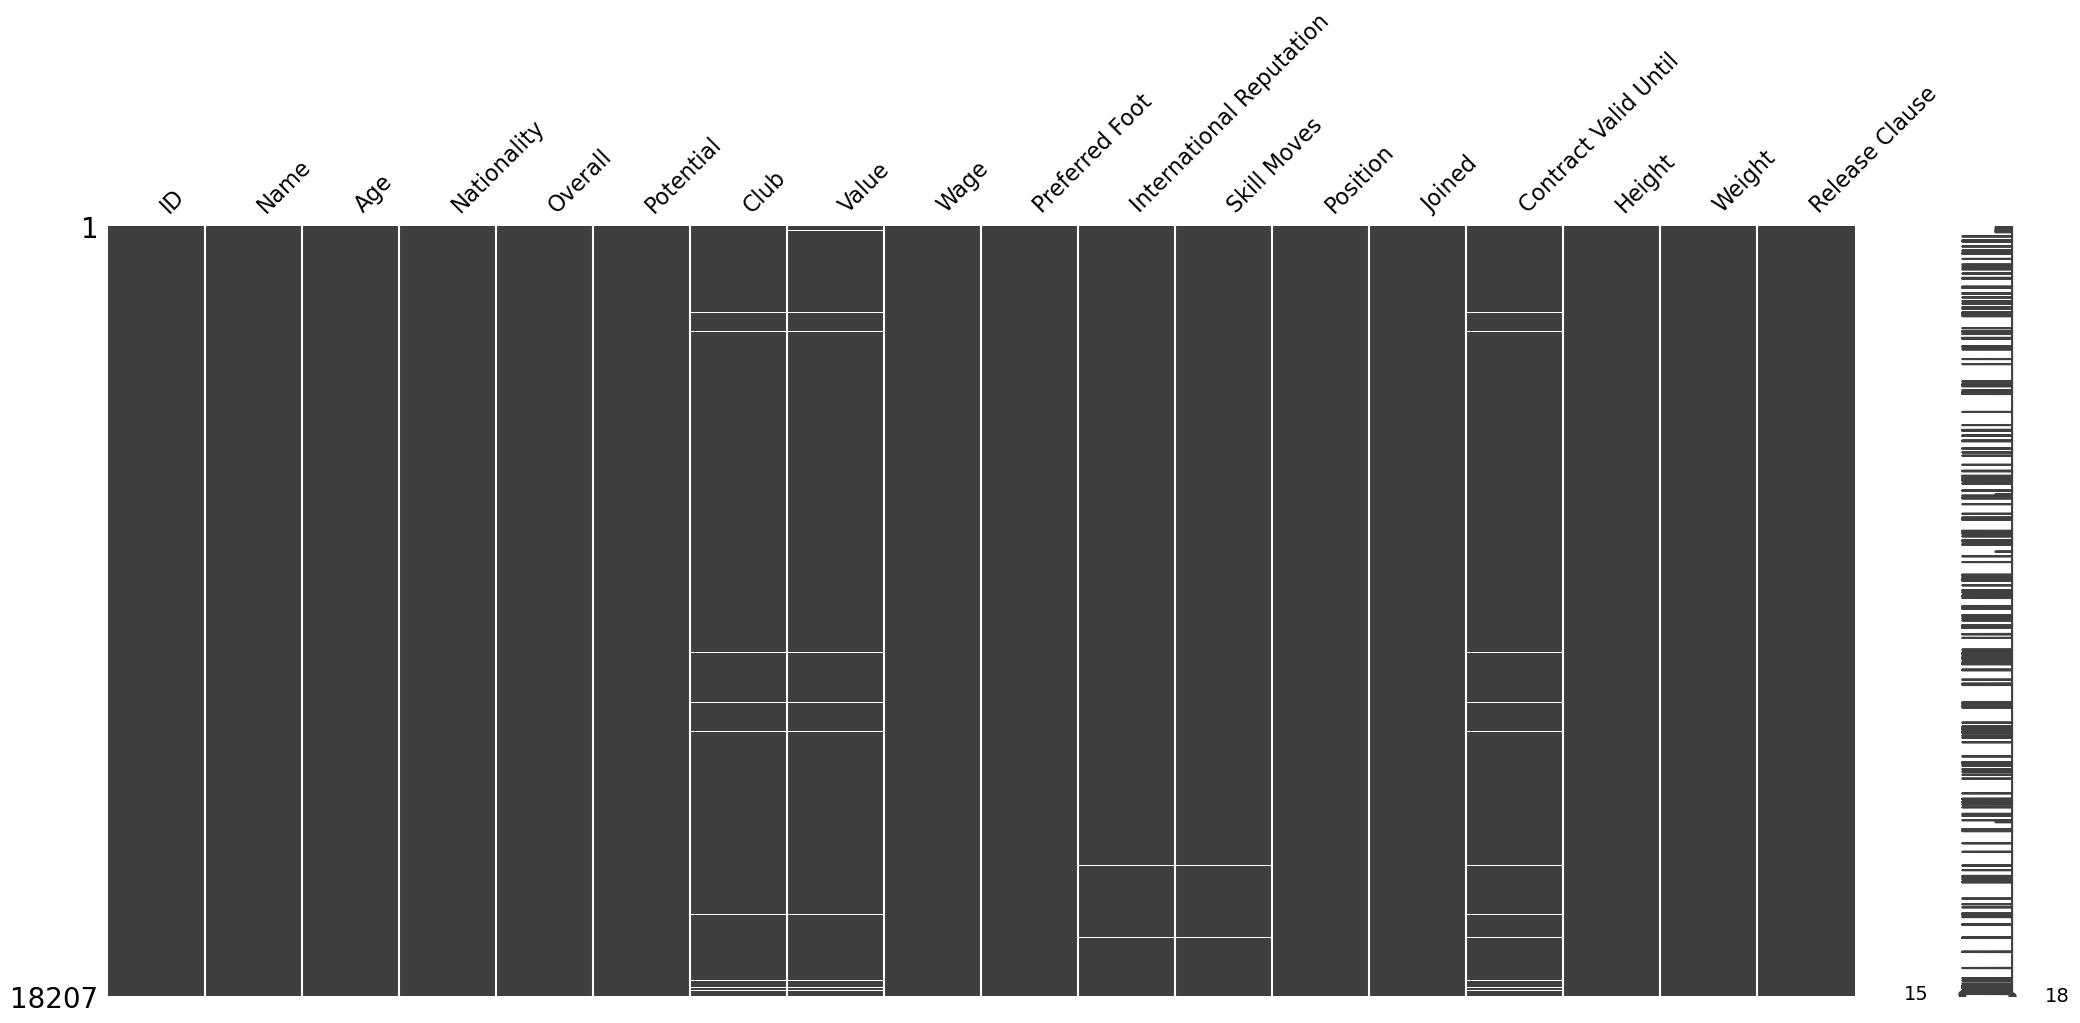

Column being sorted Name


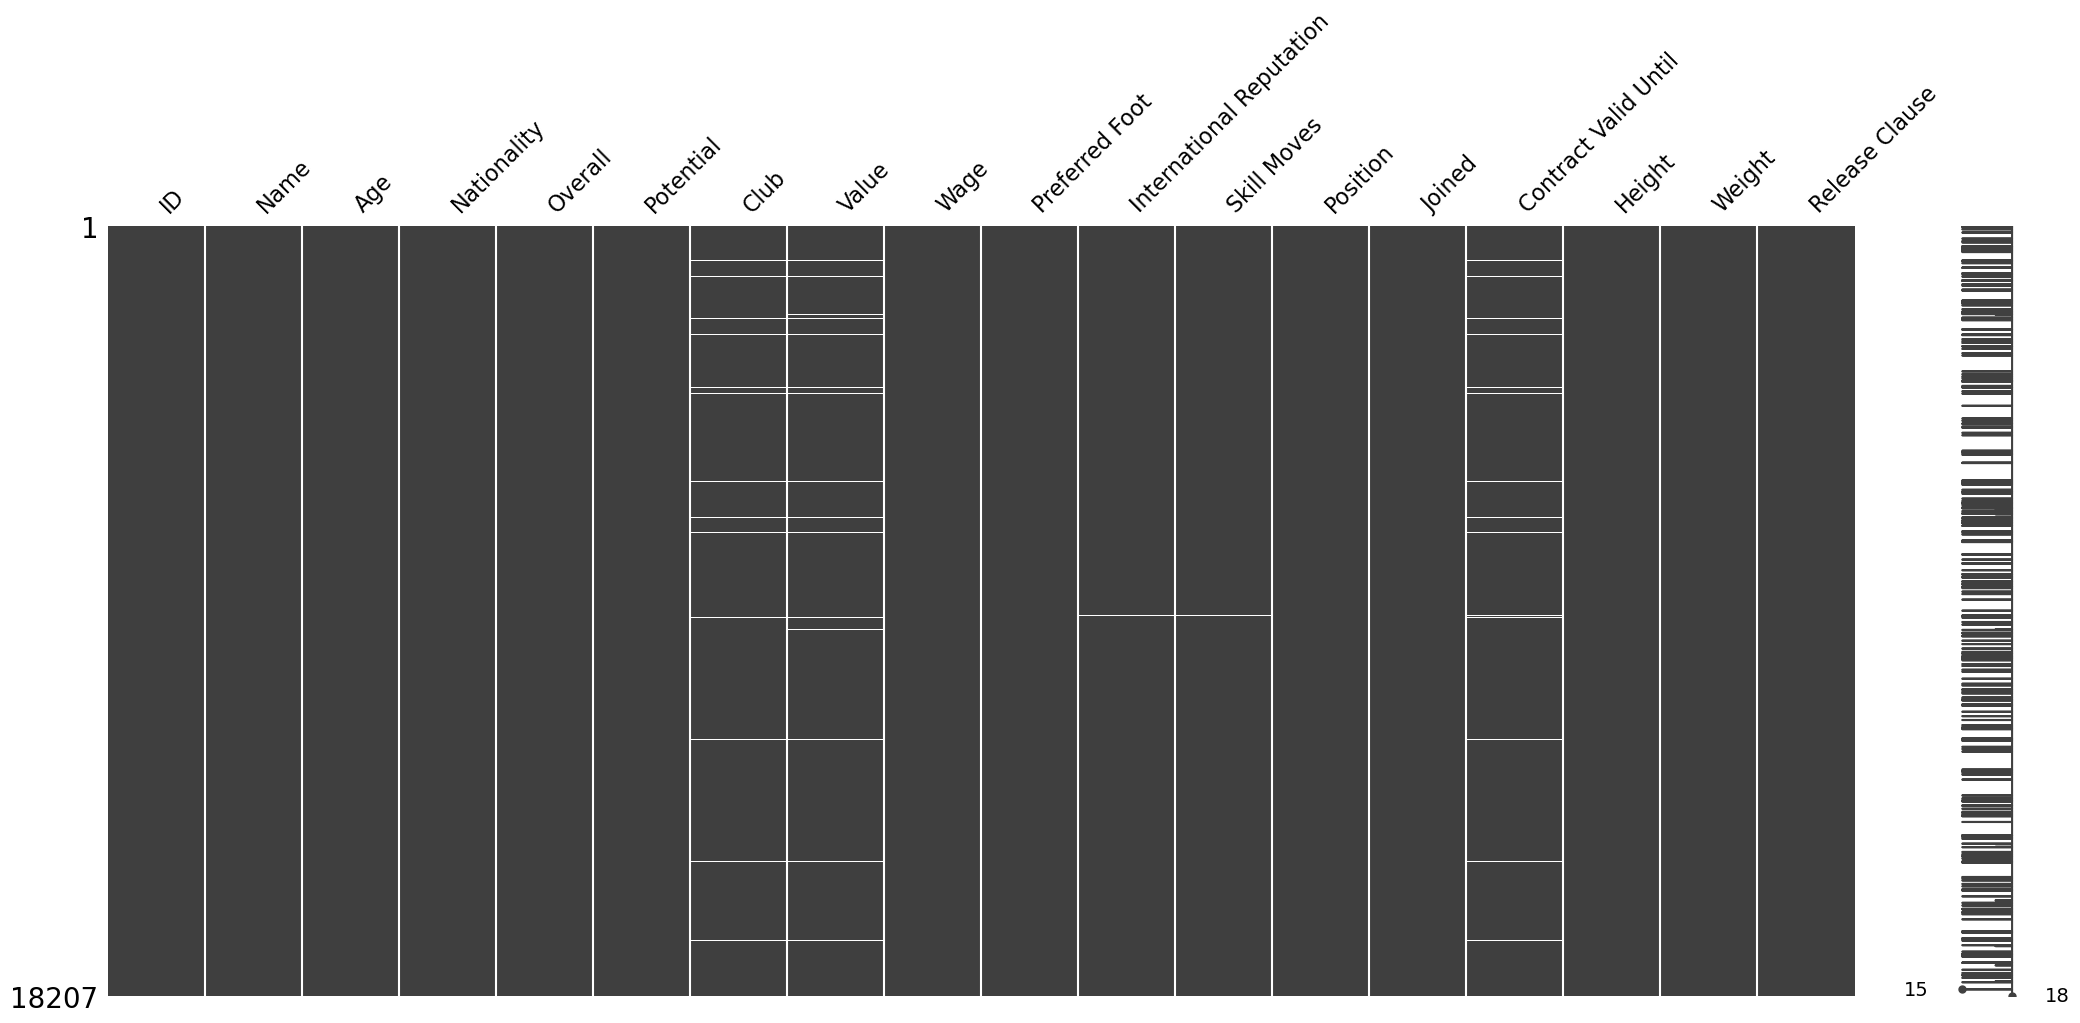

Column being sorted Age


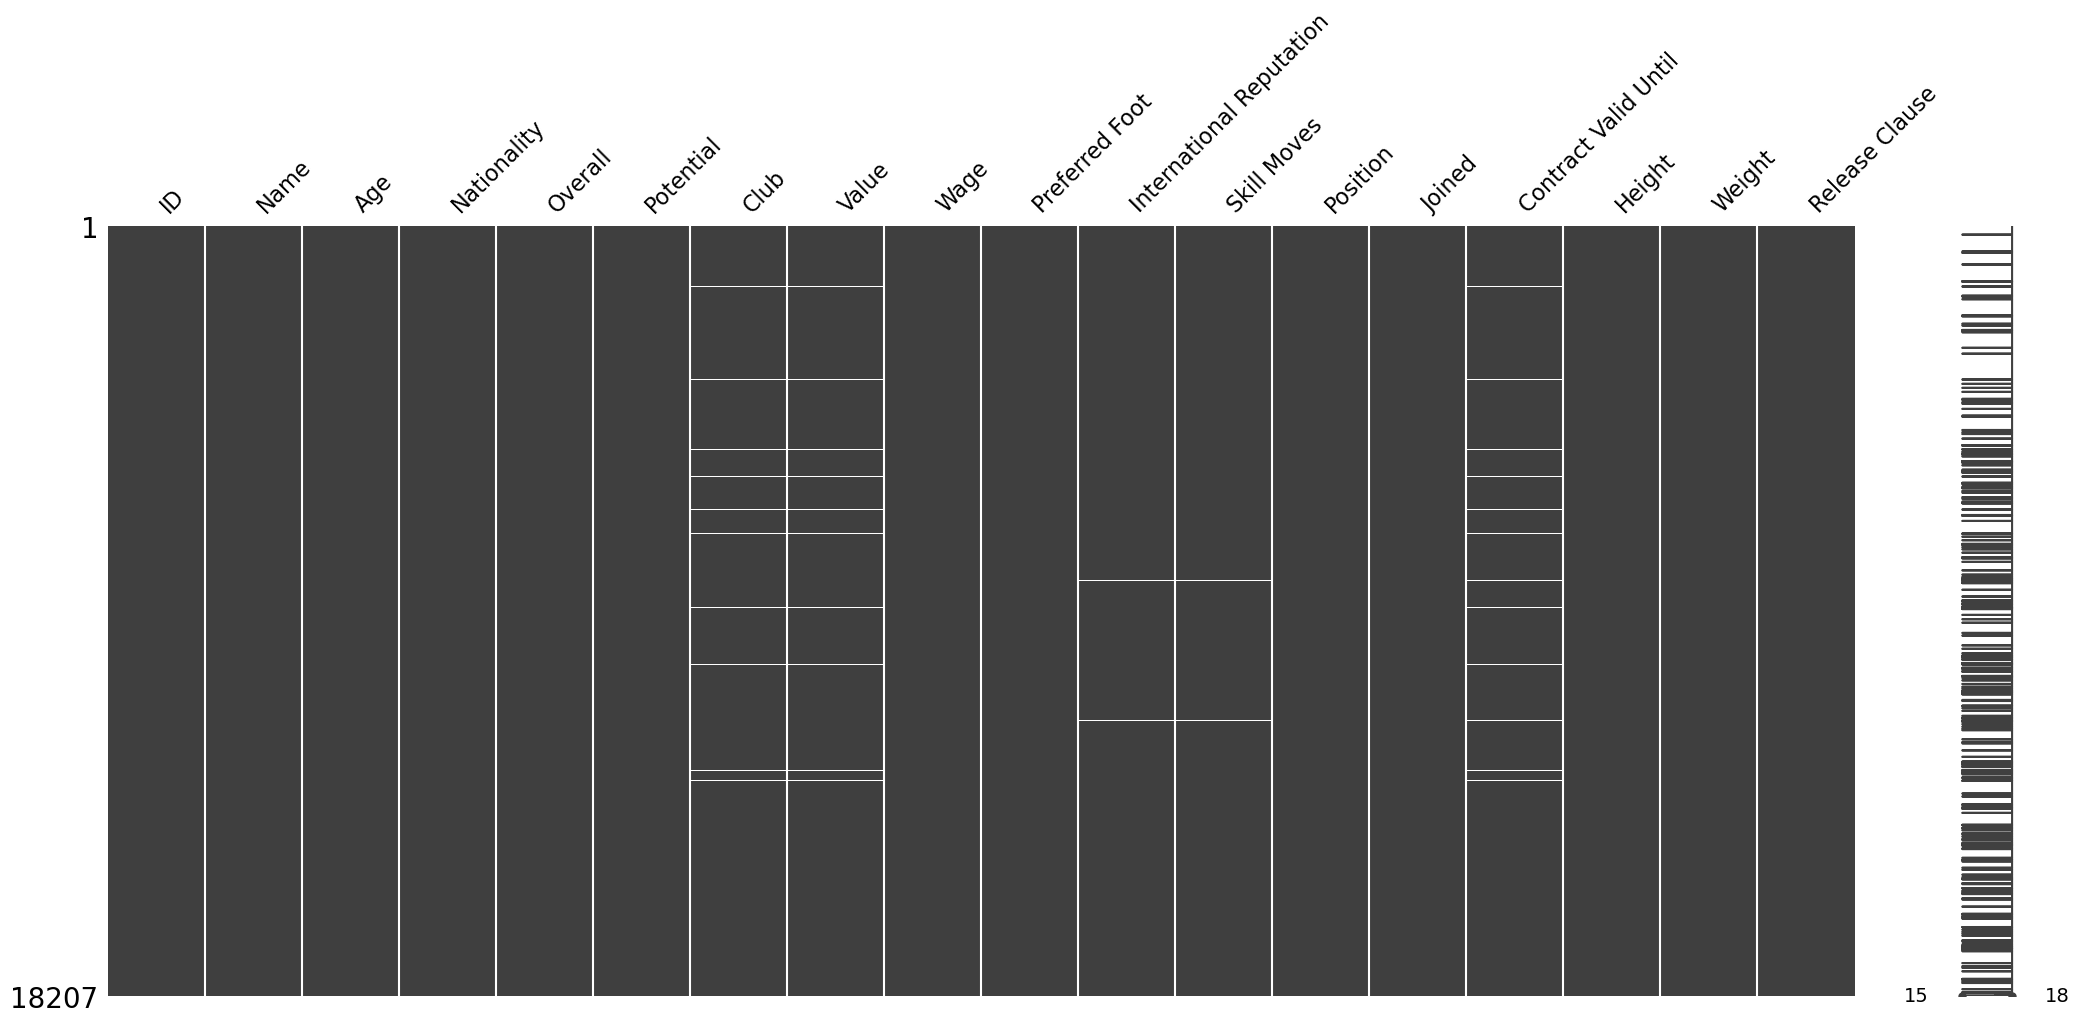

Column being sorted Nationality


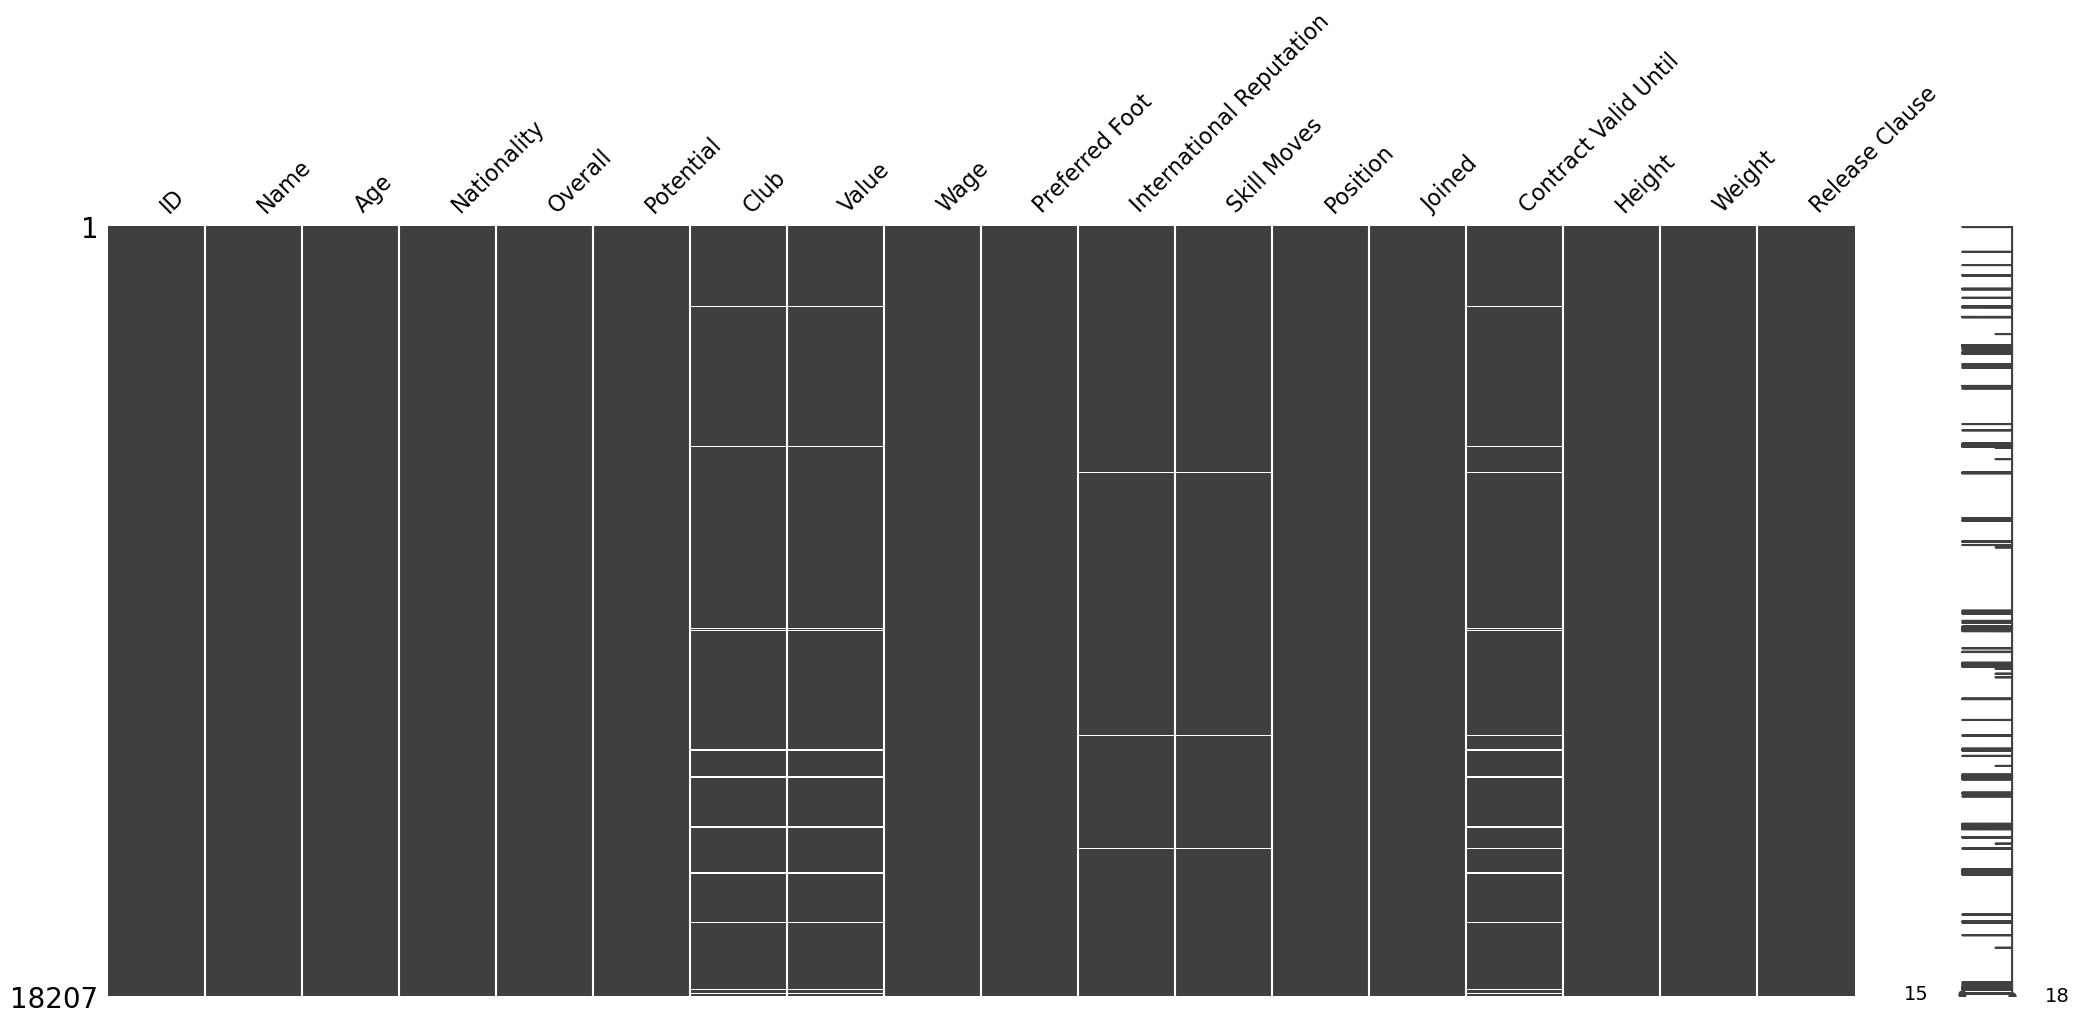

Column being sorted Overall


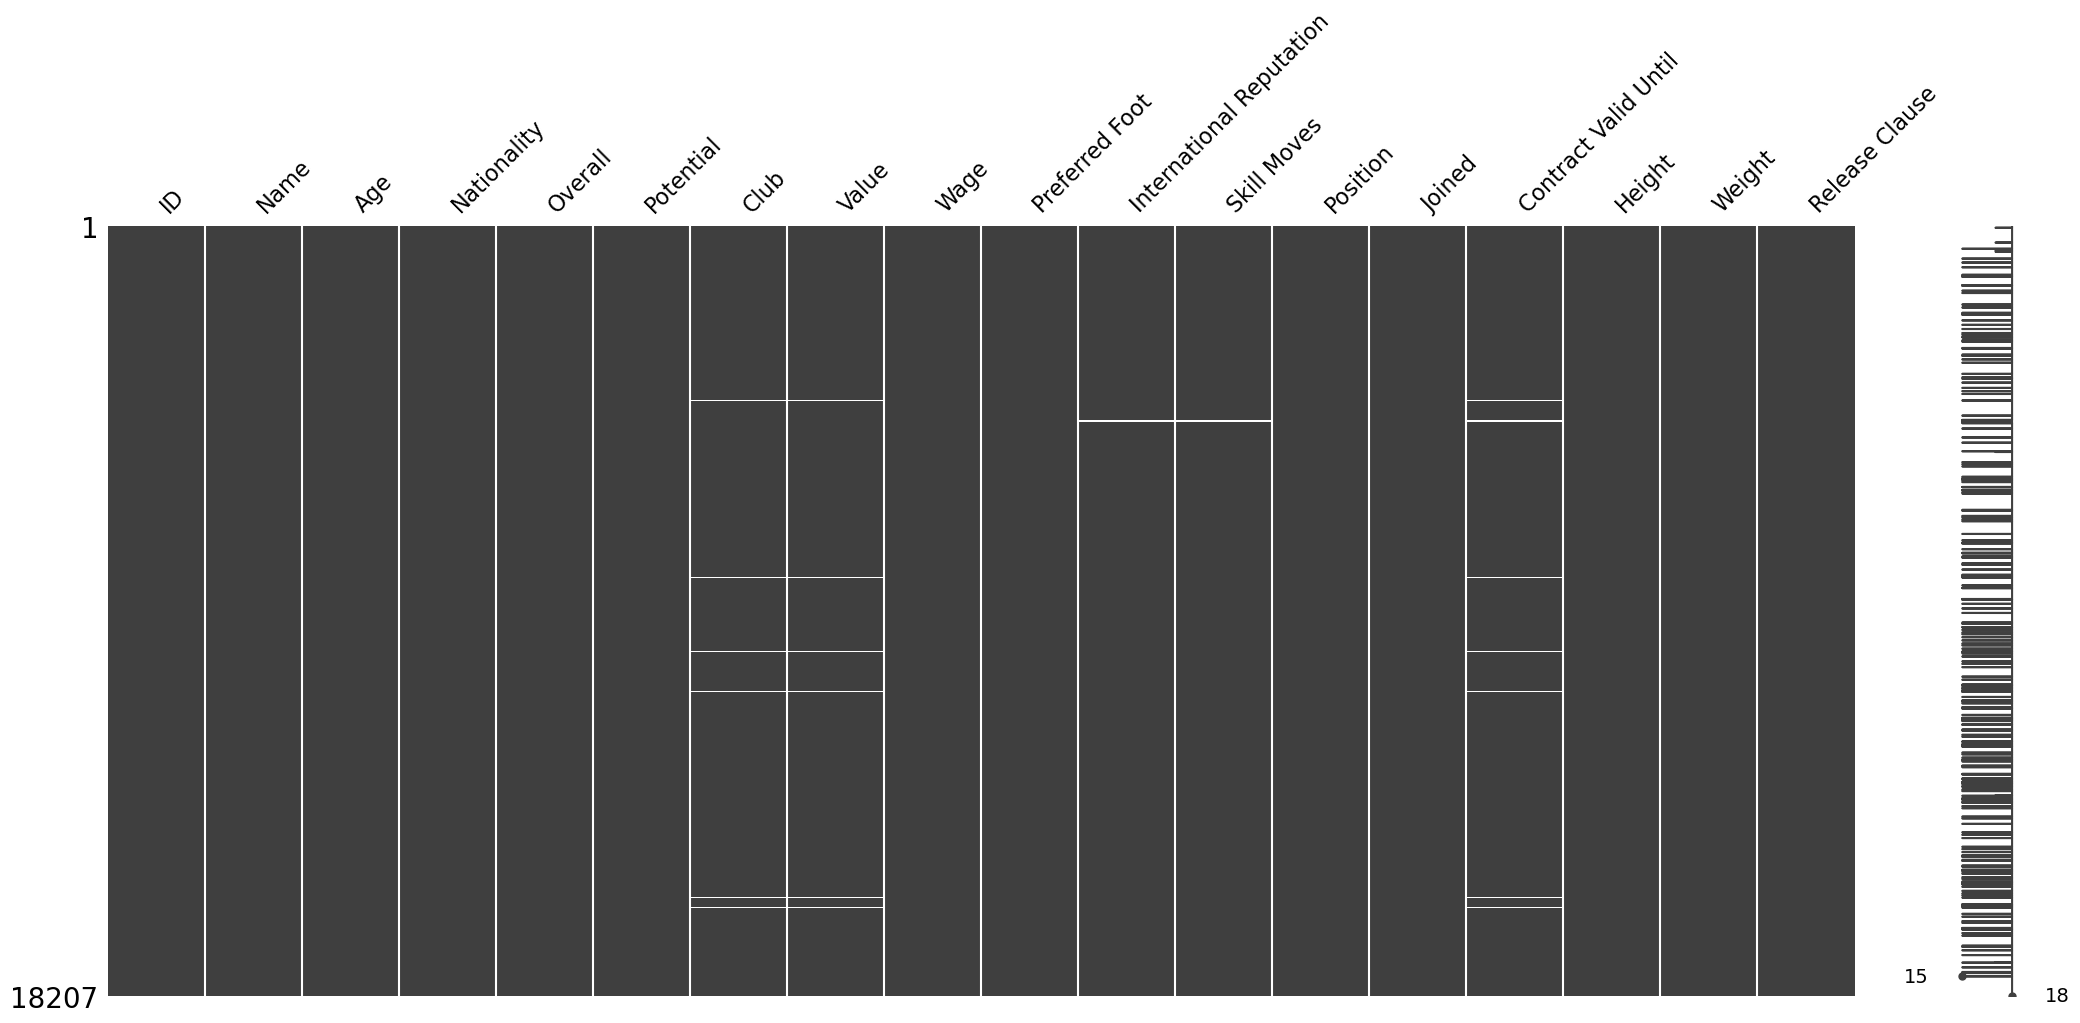

Column being sorted Potential


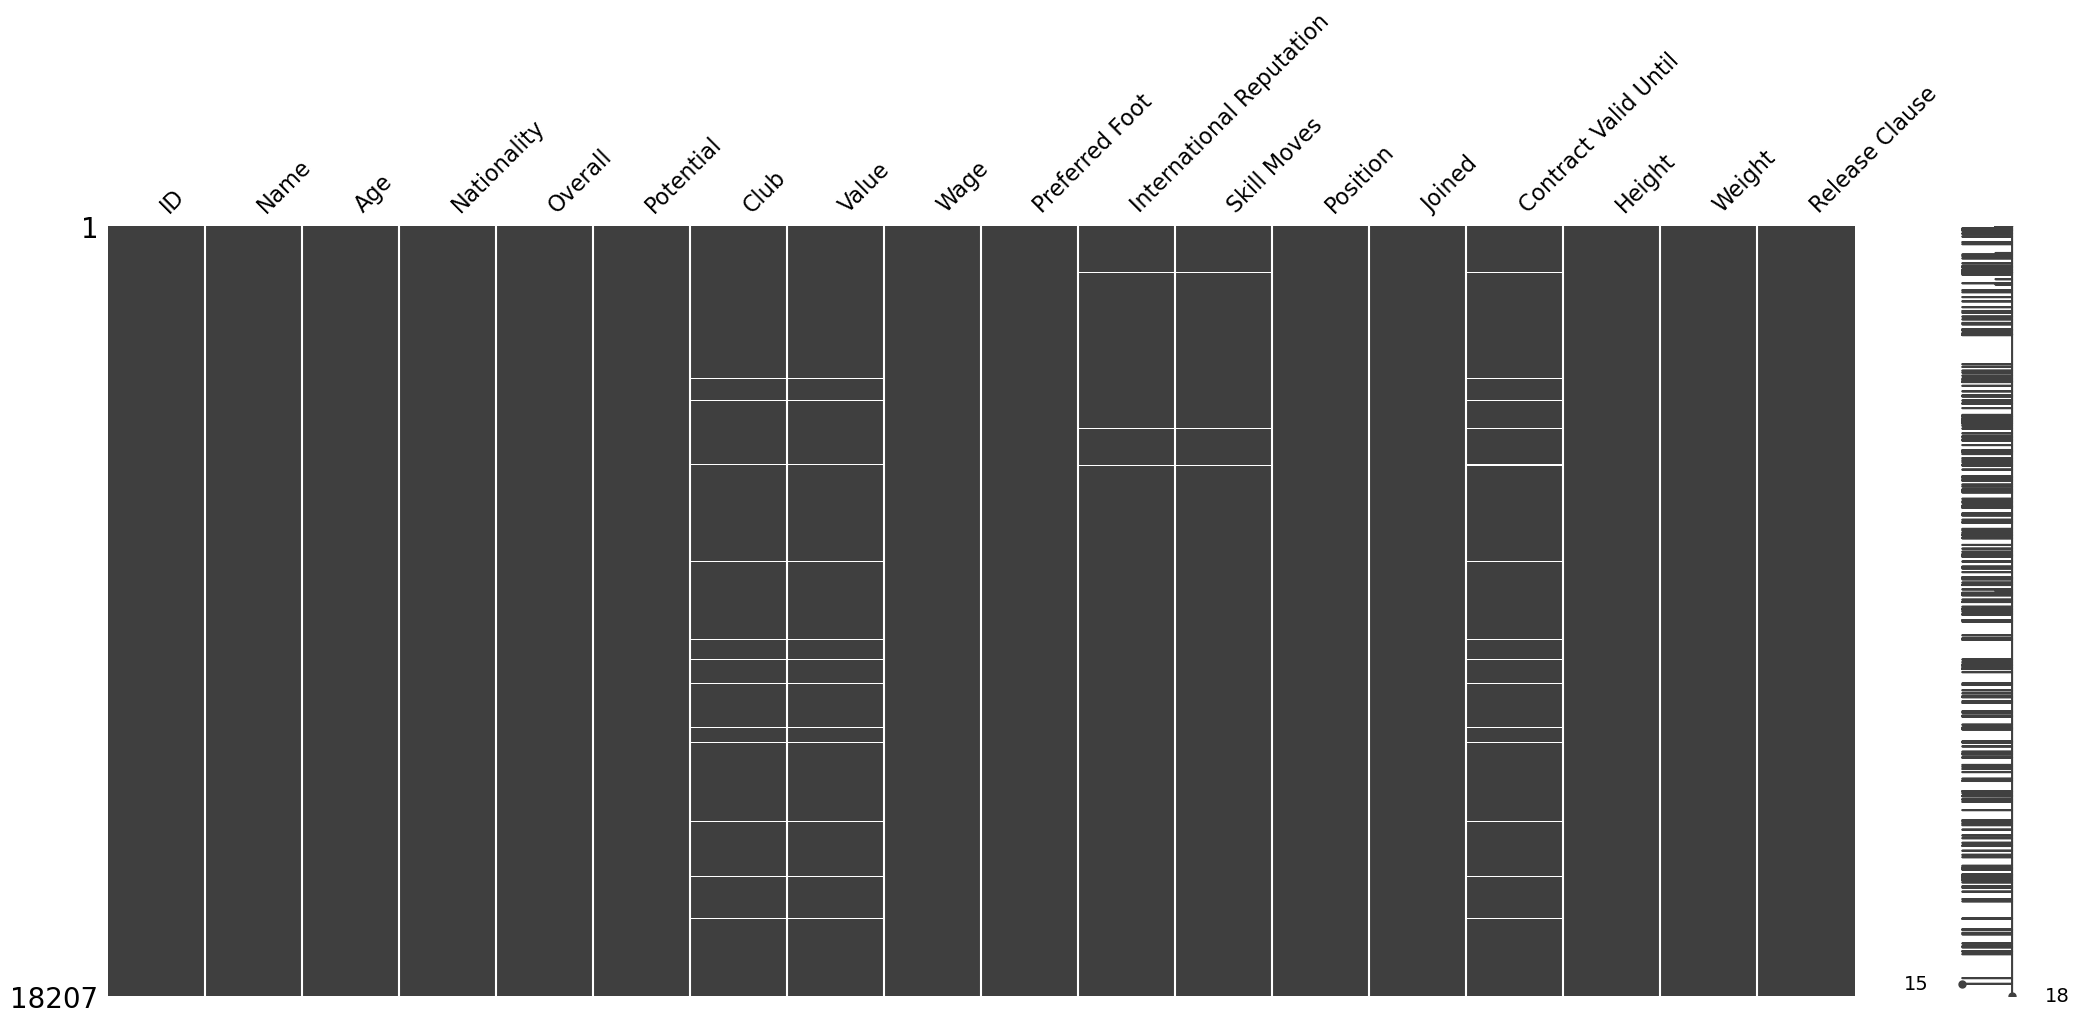

Column being sorted Club


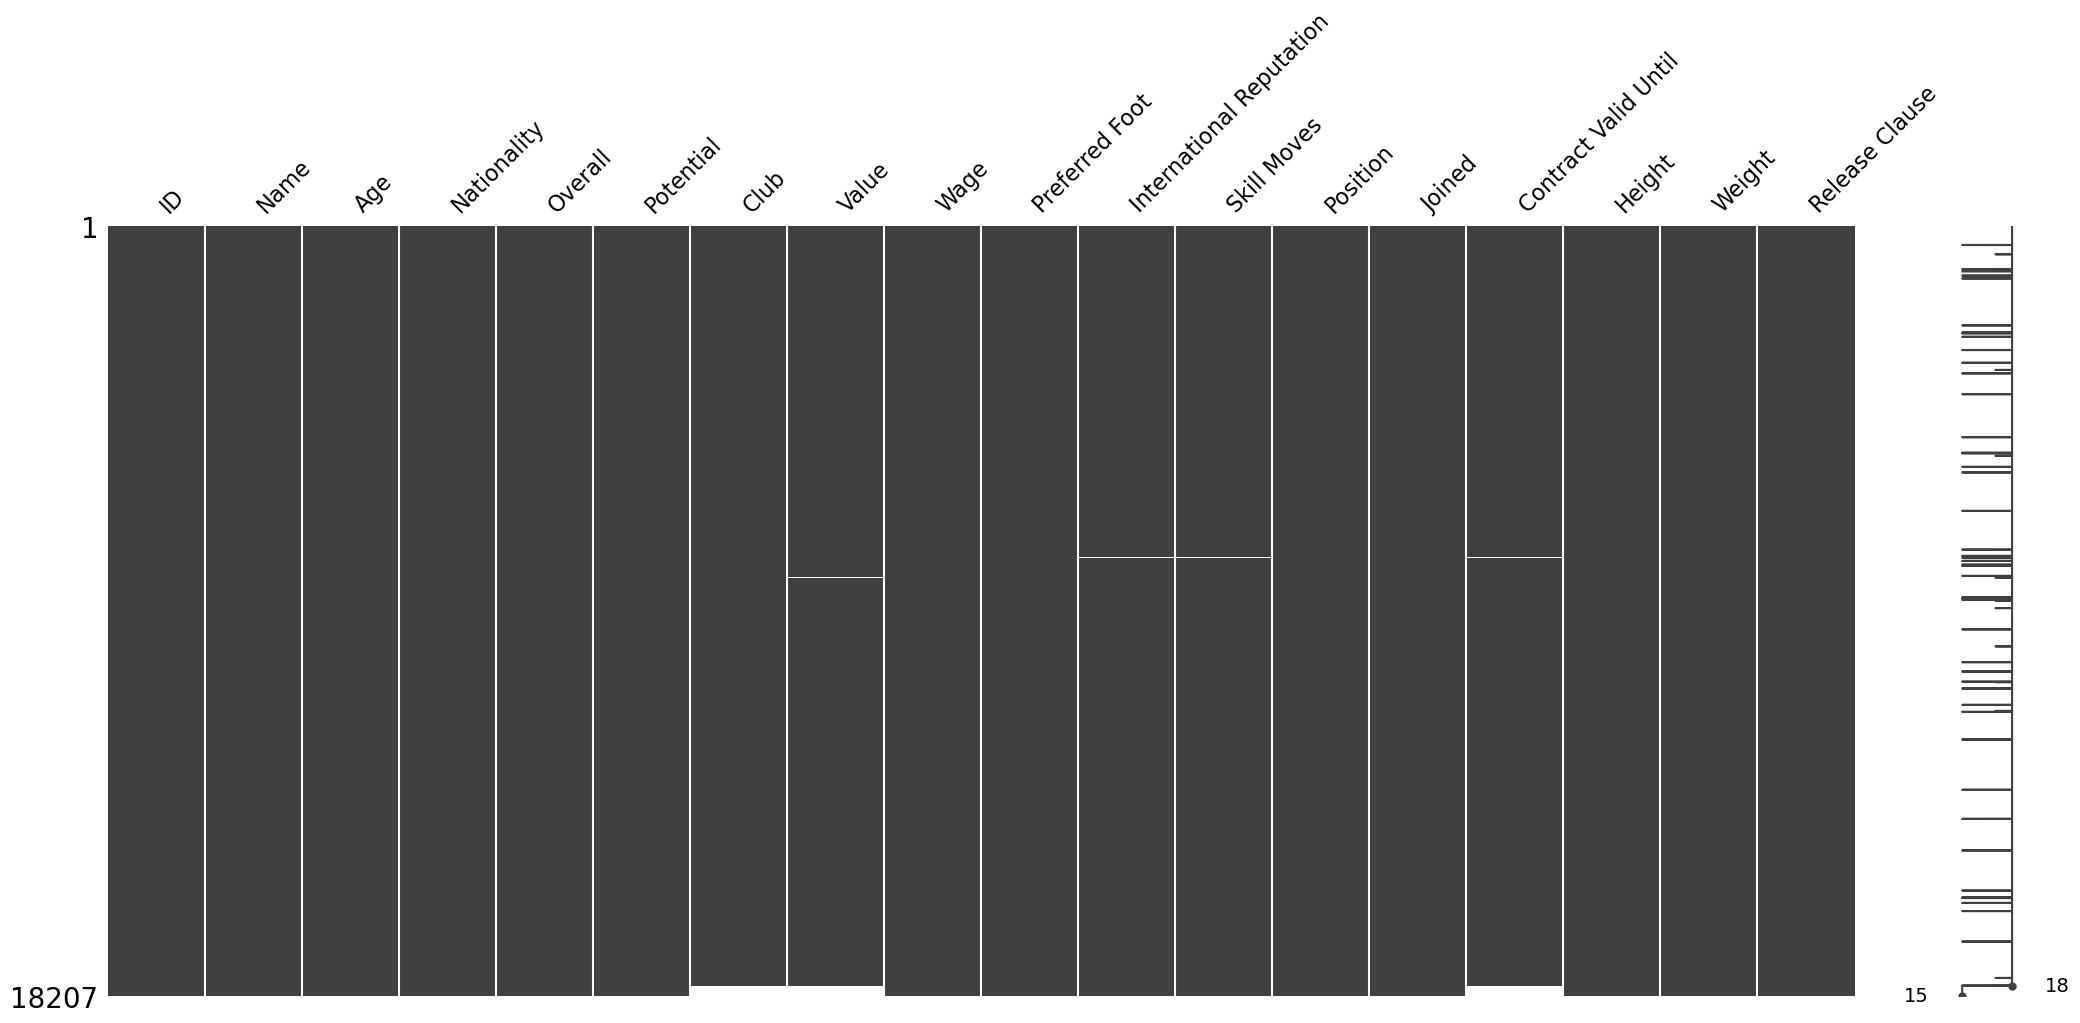

Column being sorted Value


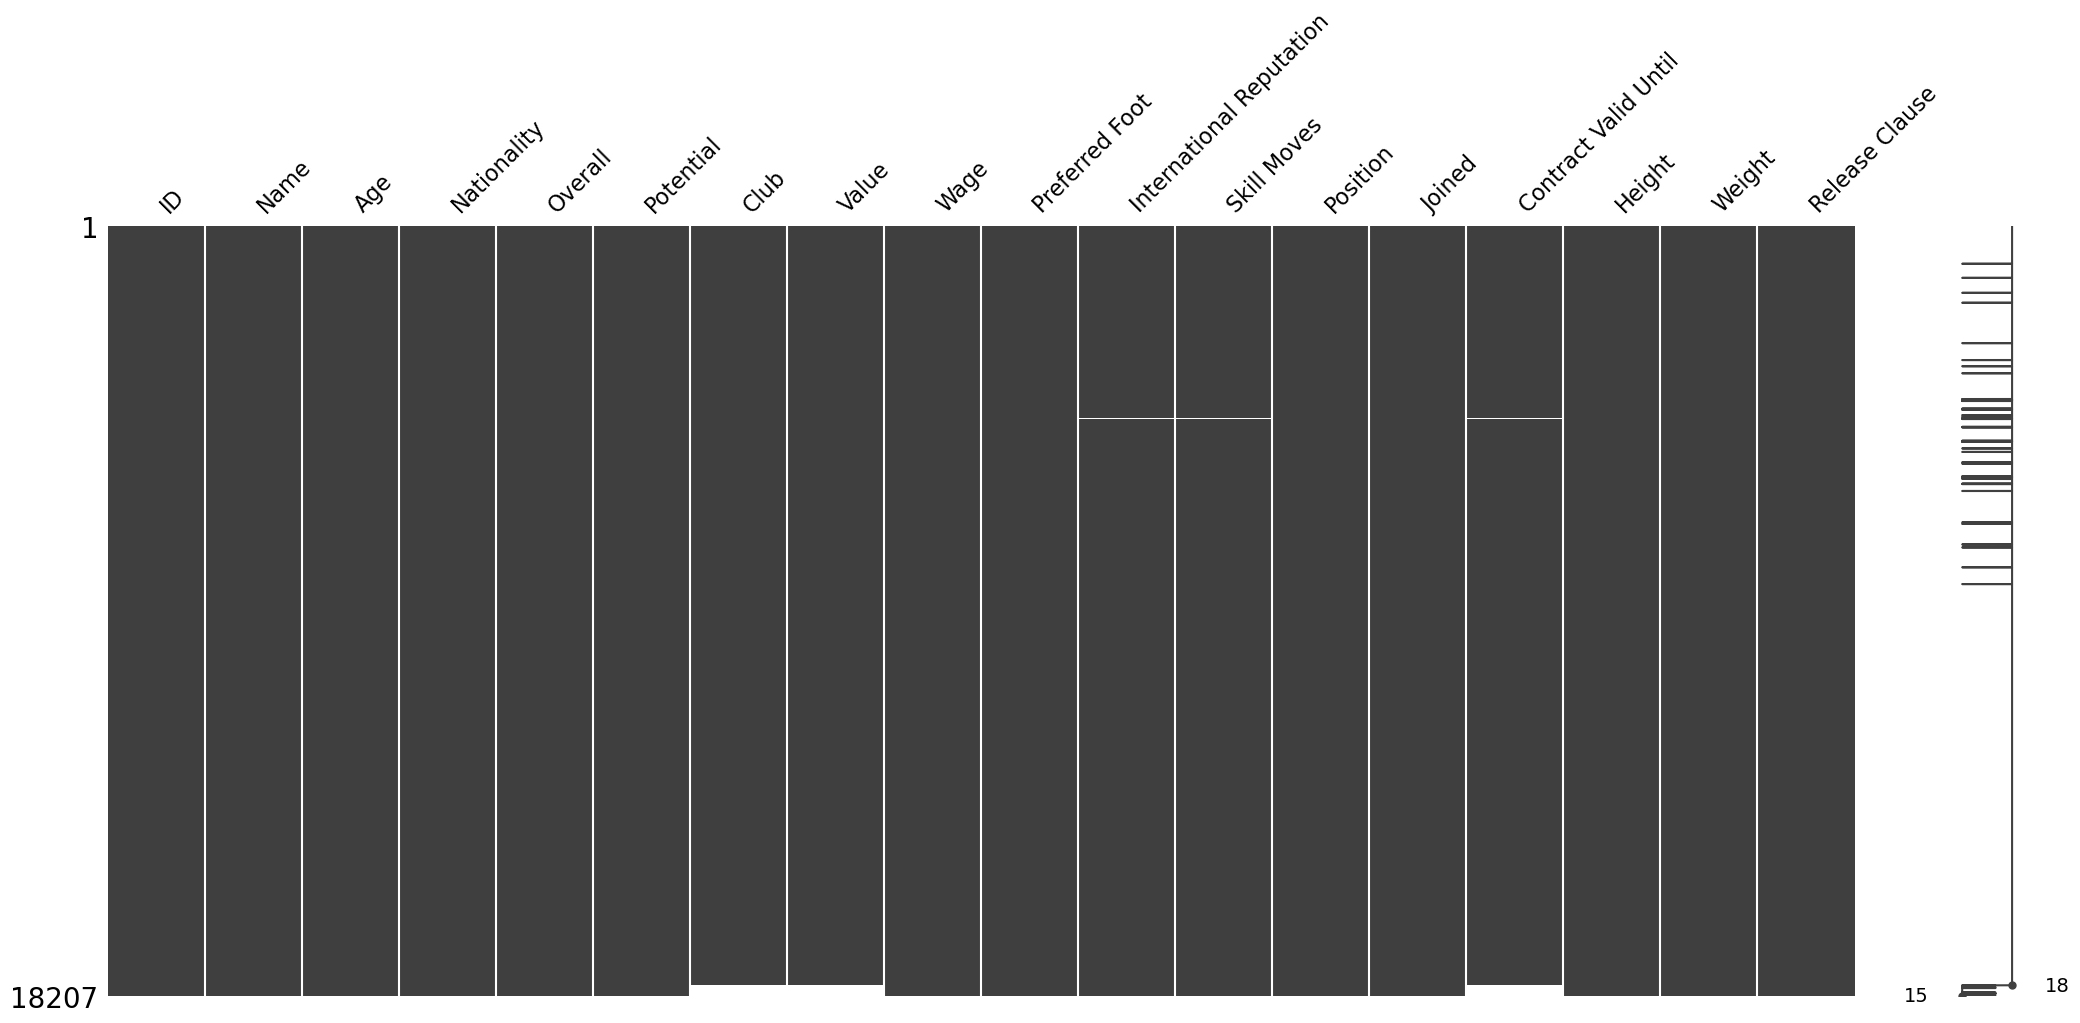

Column being sorted Wage


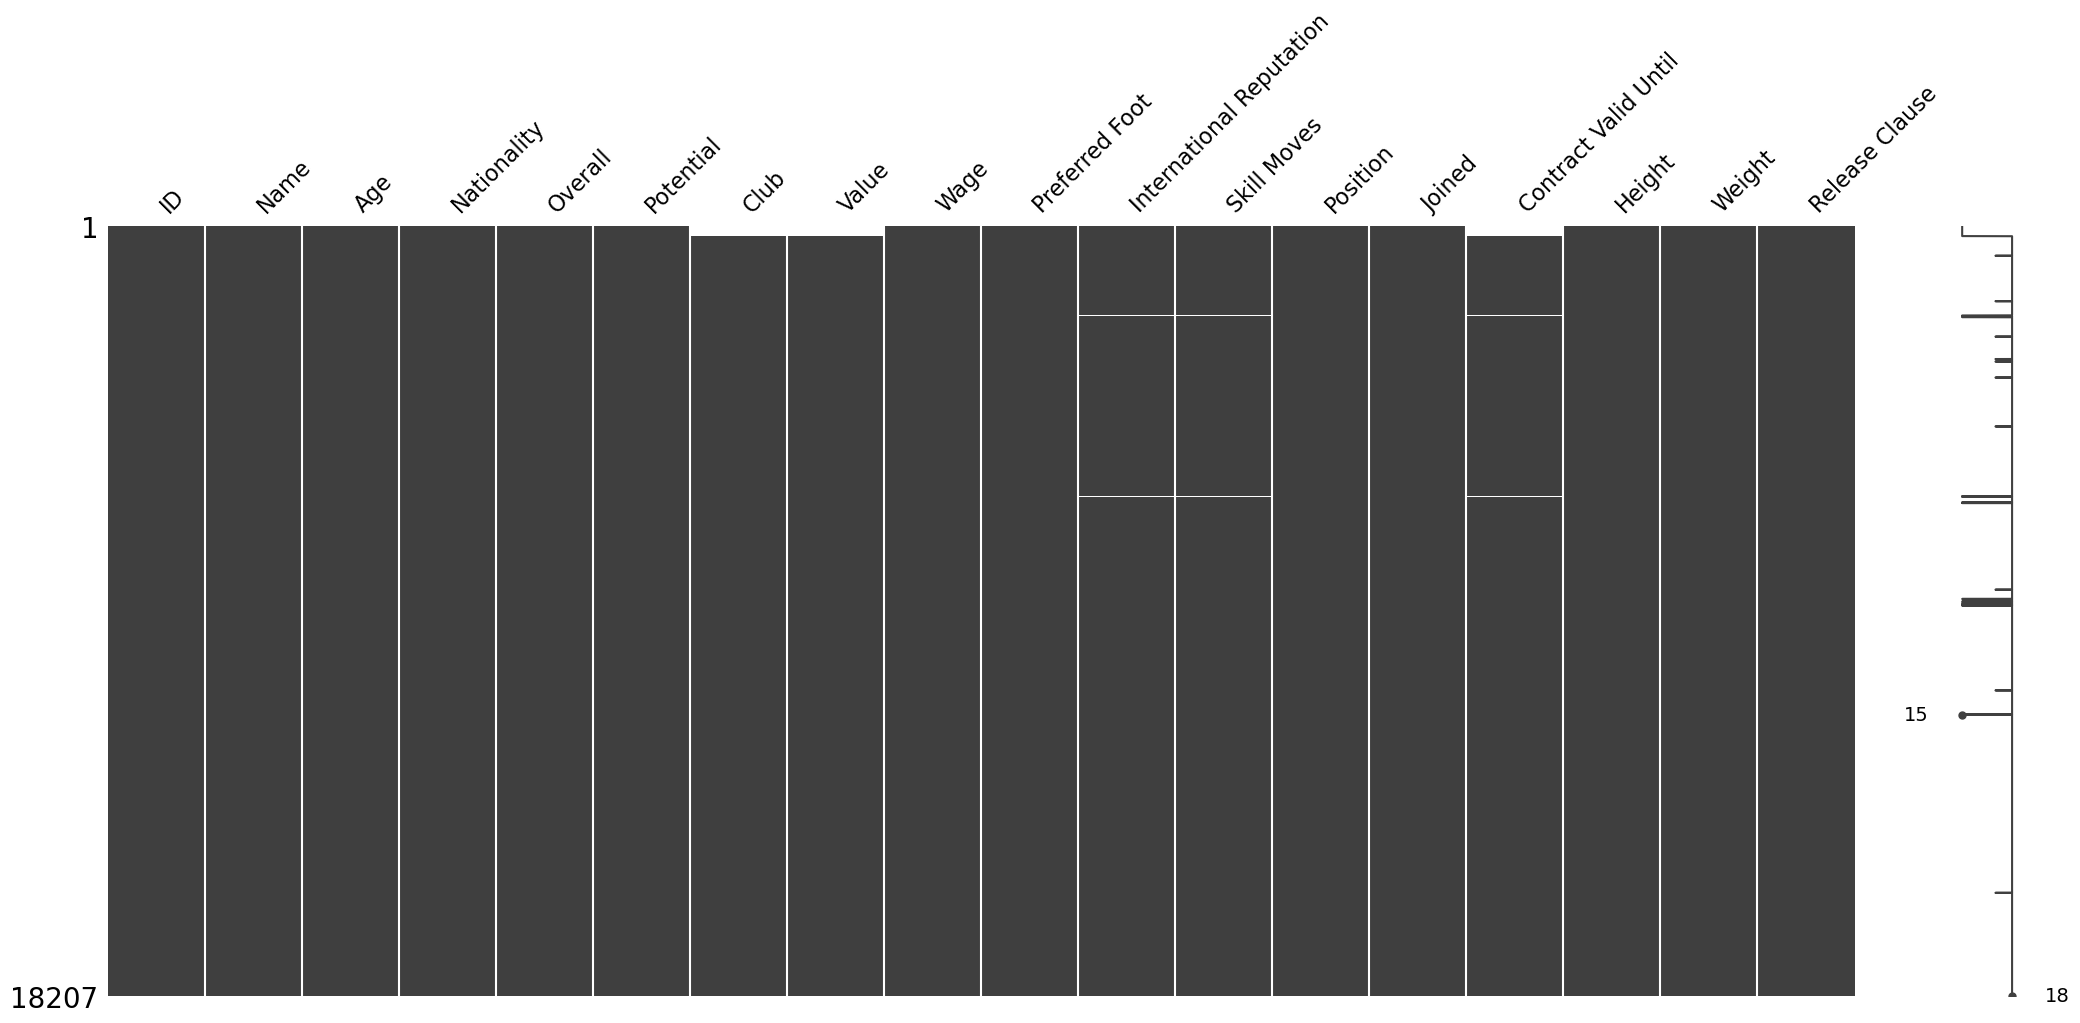

Column being sorted Preferred Foot


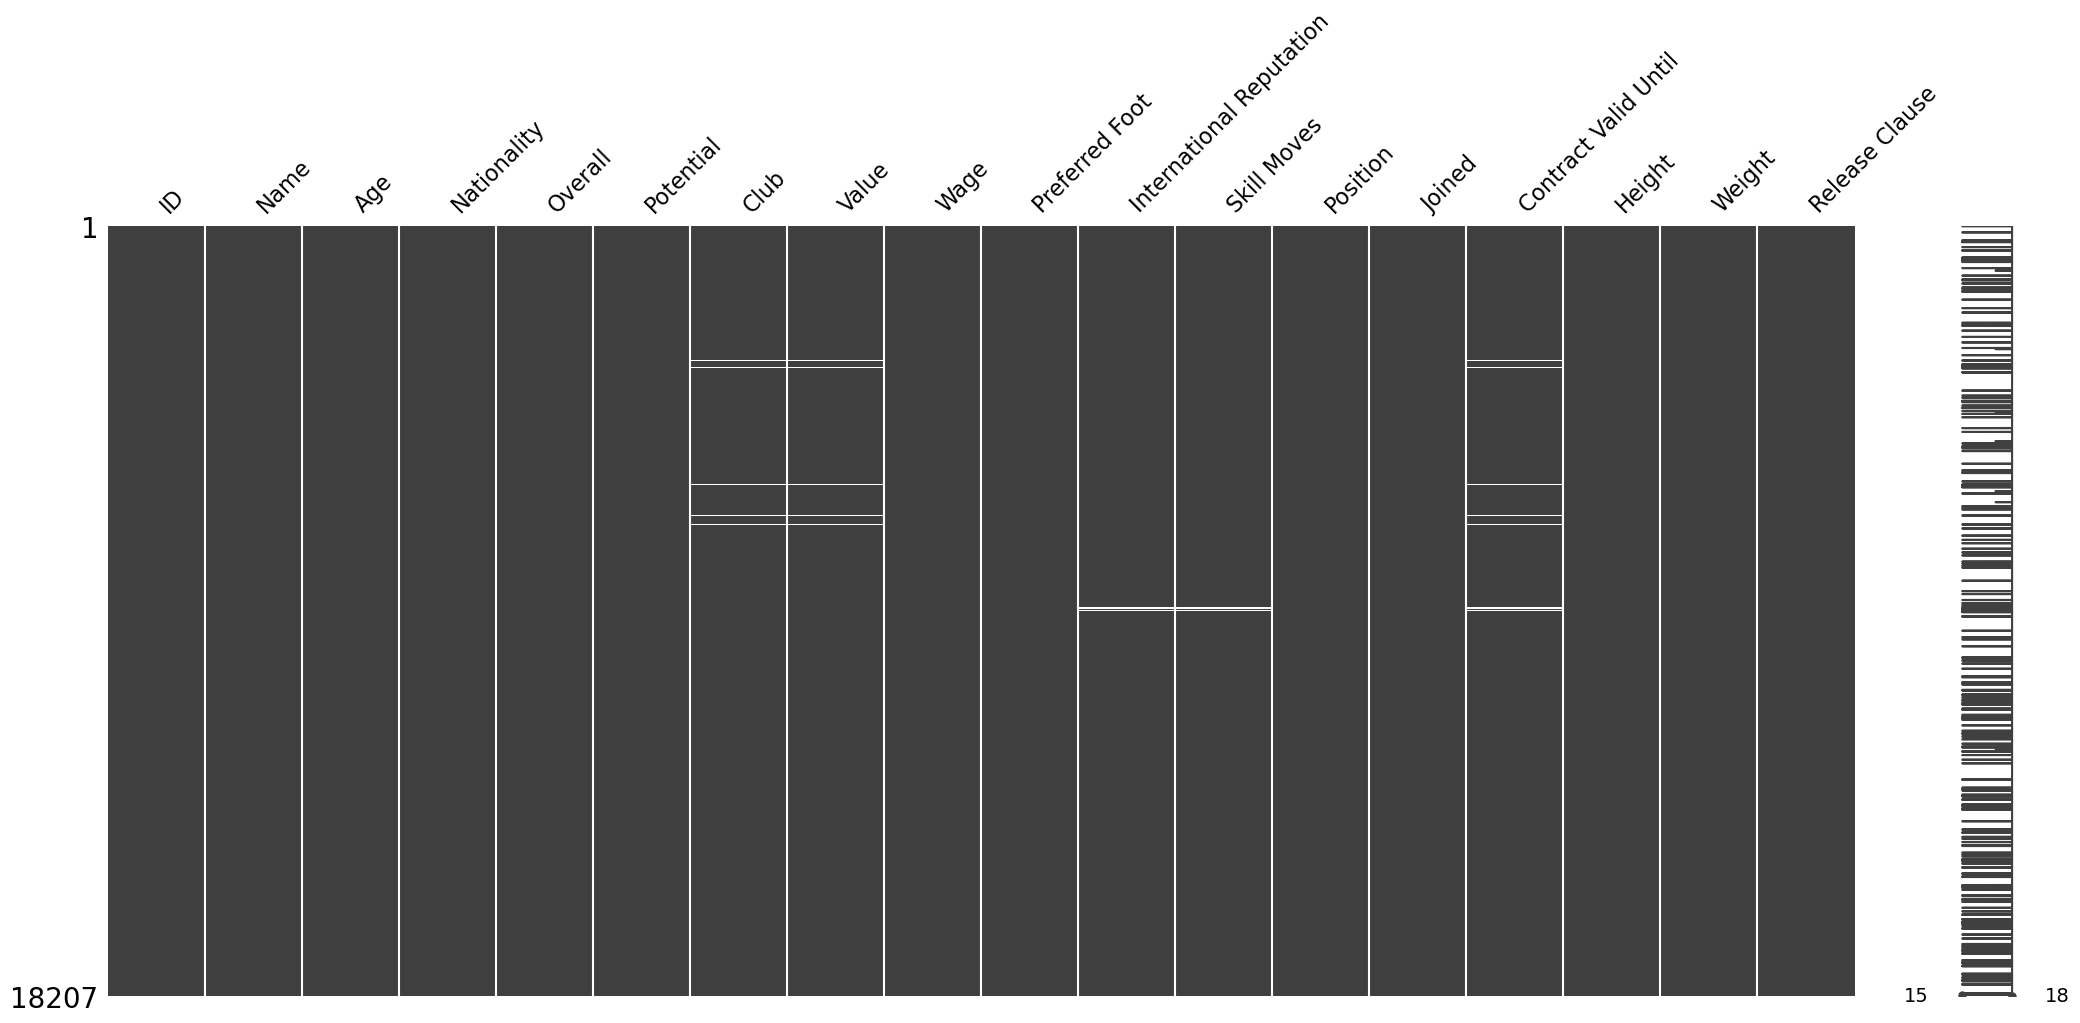

Column being sorted International Reputation


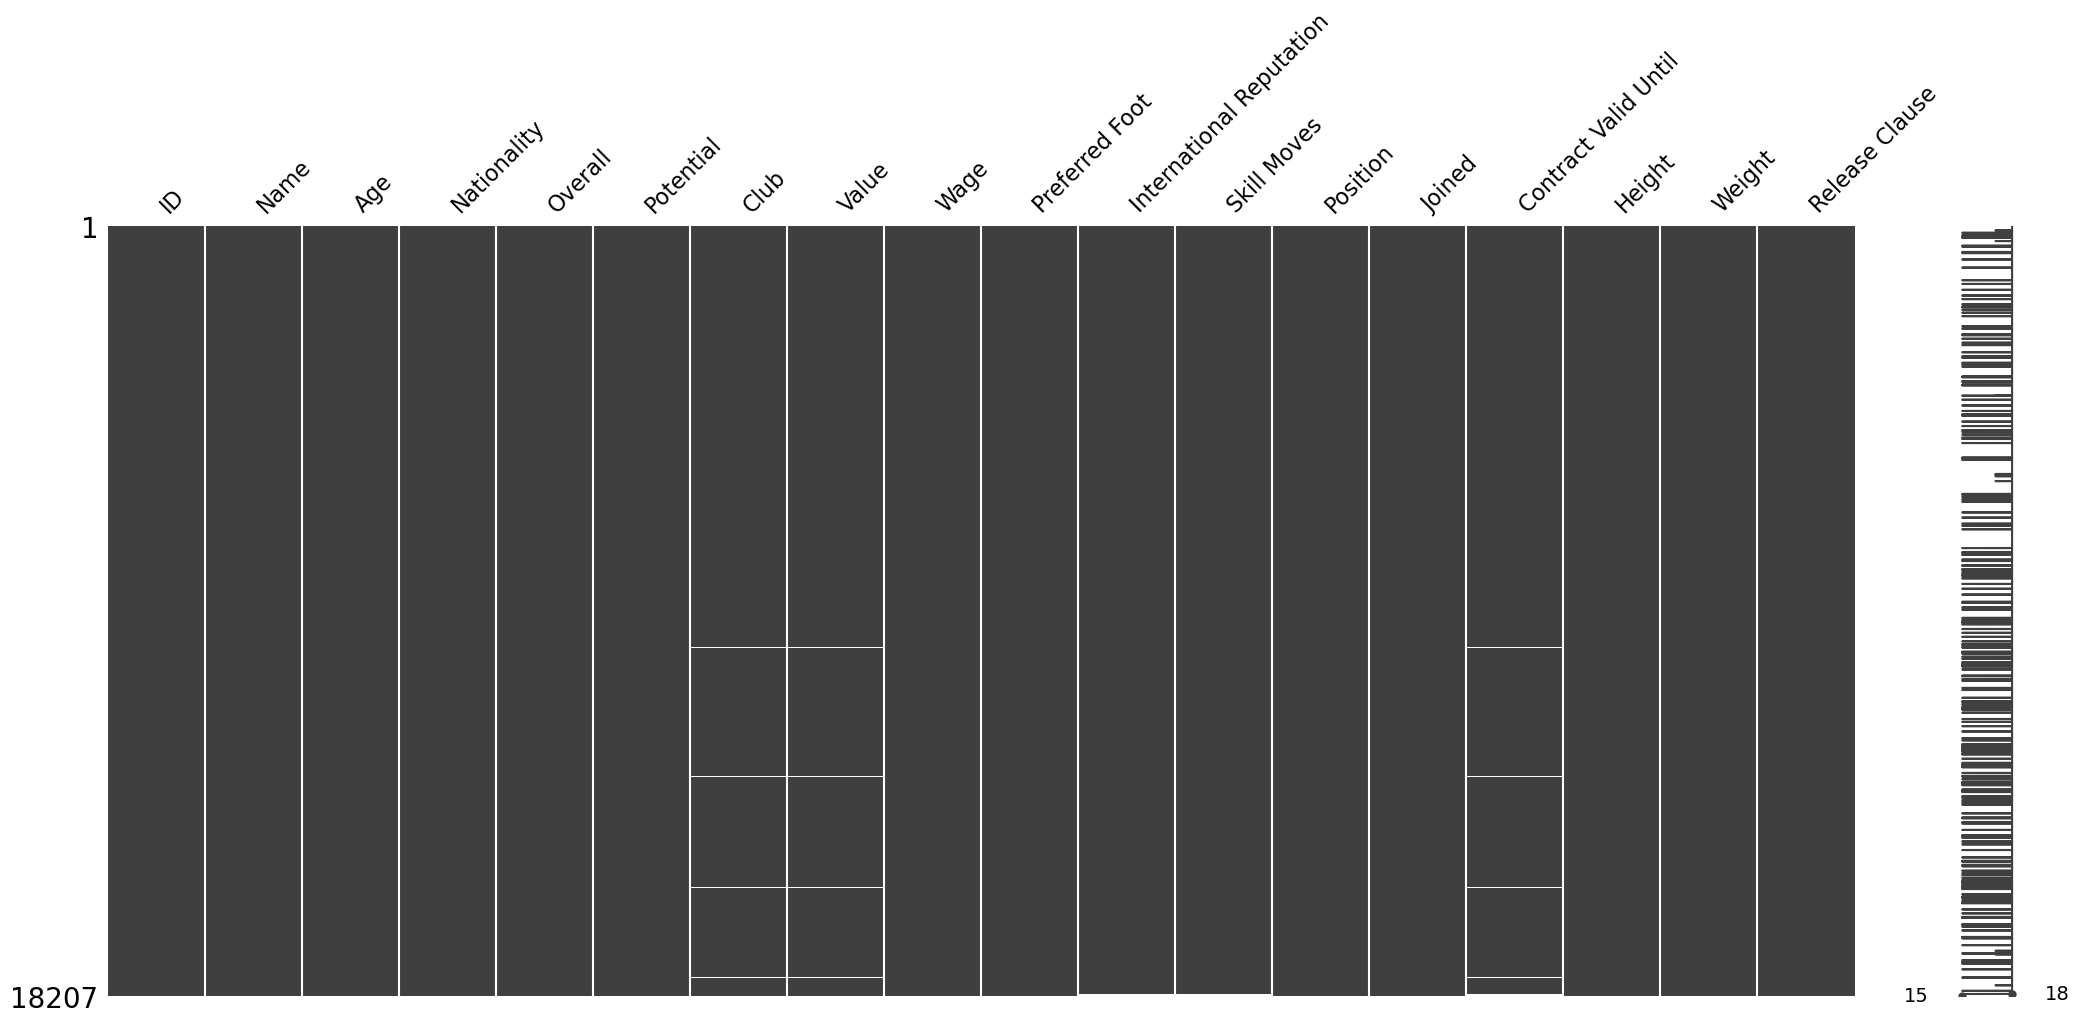

Column being sorted Skill Moves


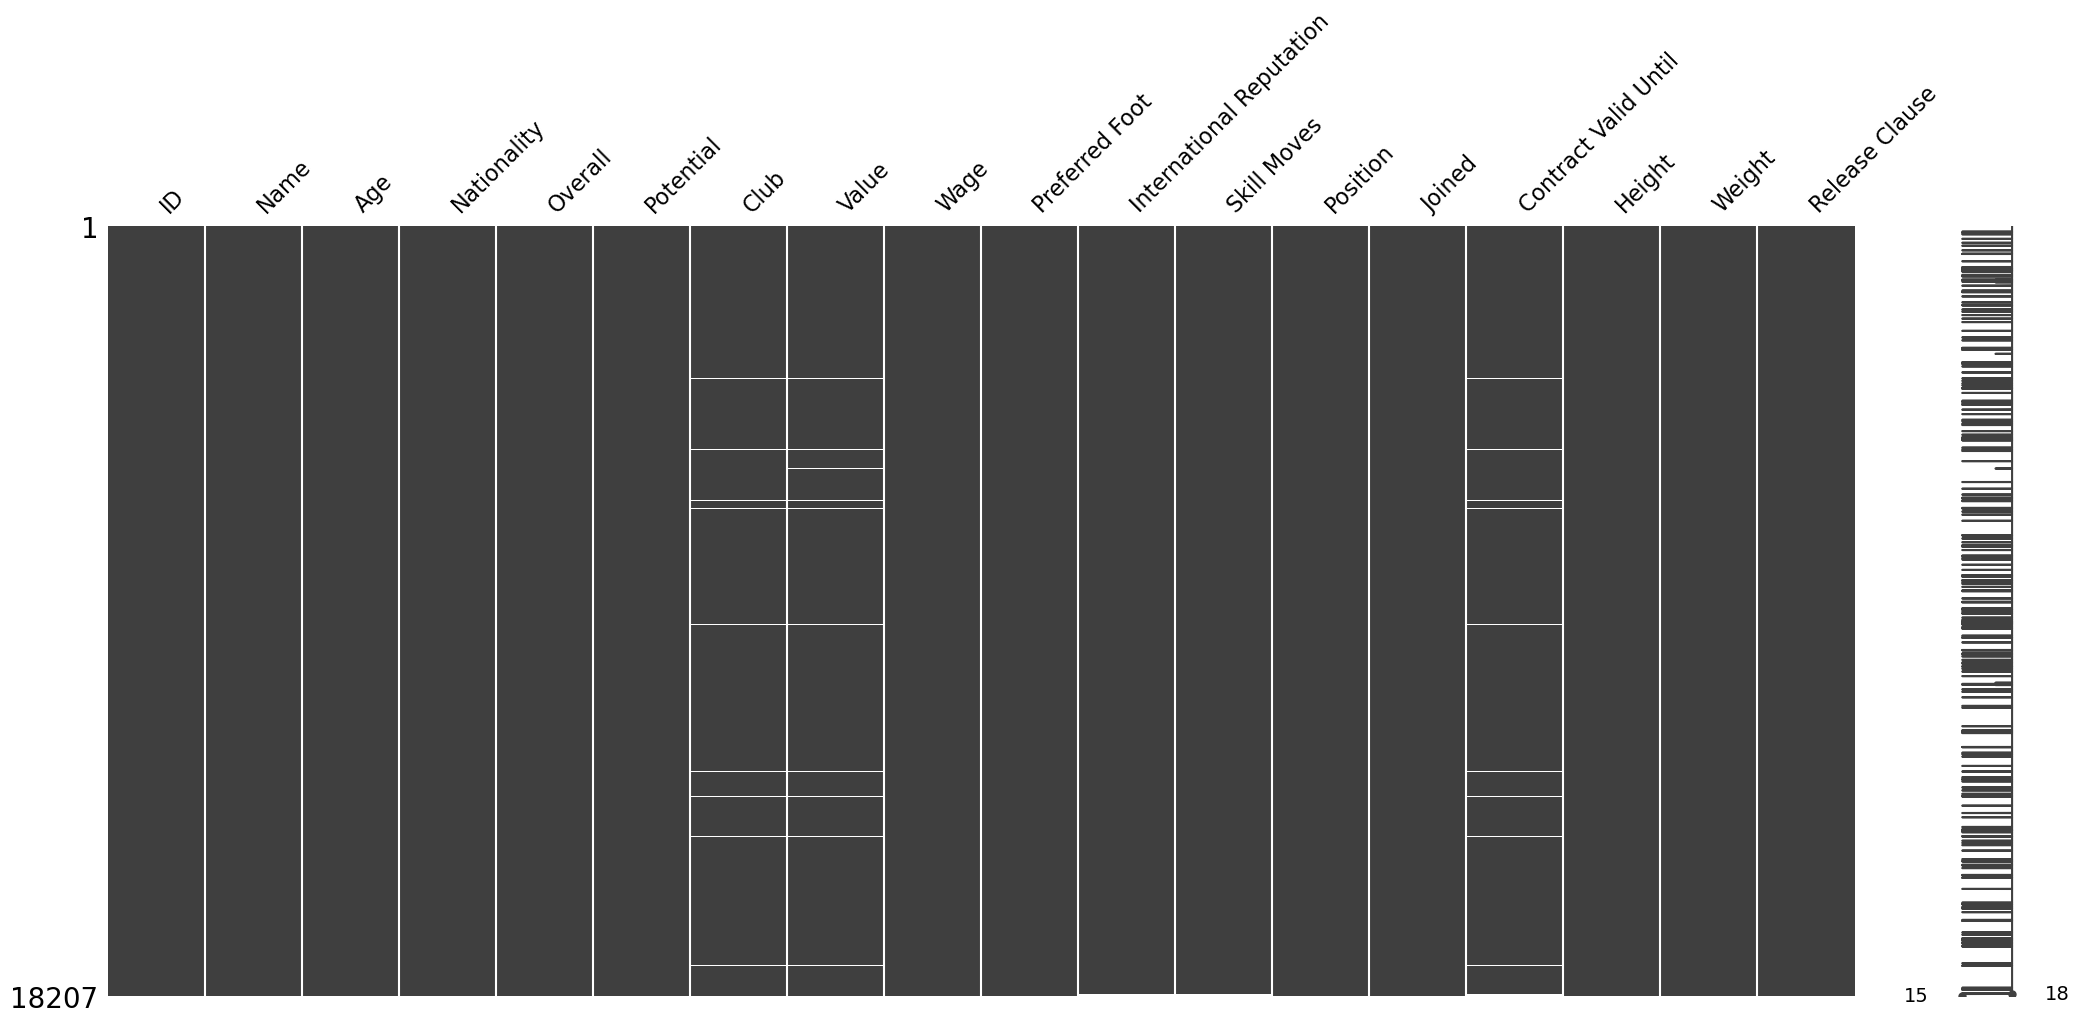

Column being sorted Position


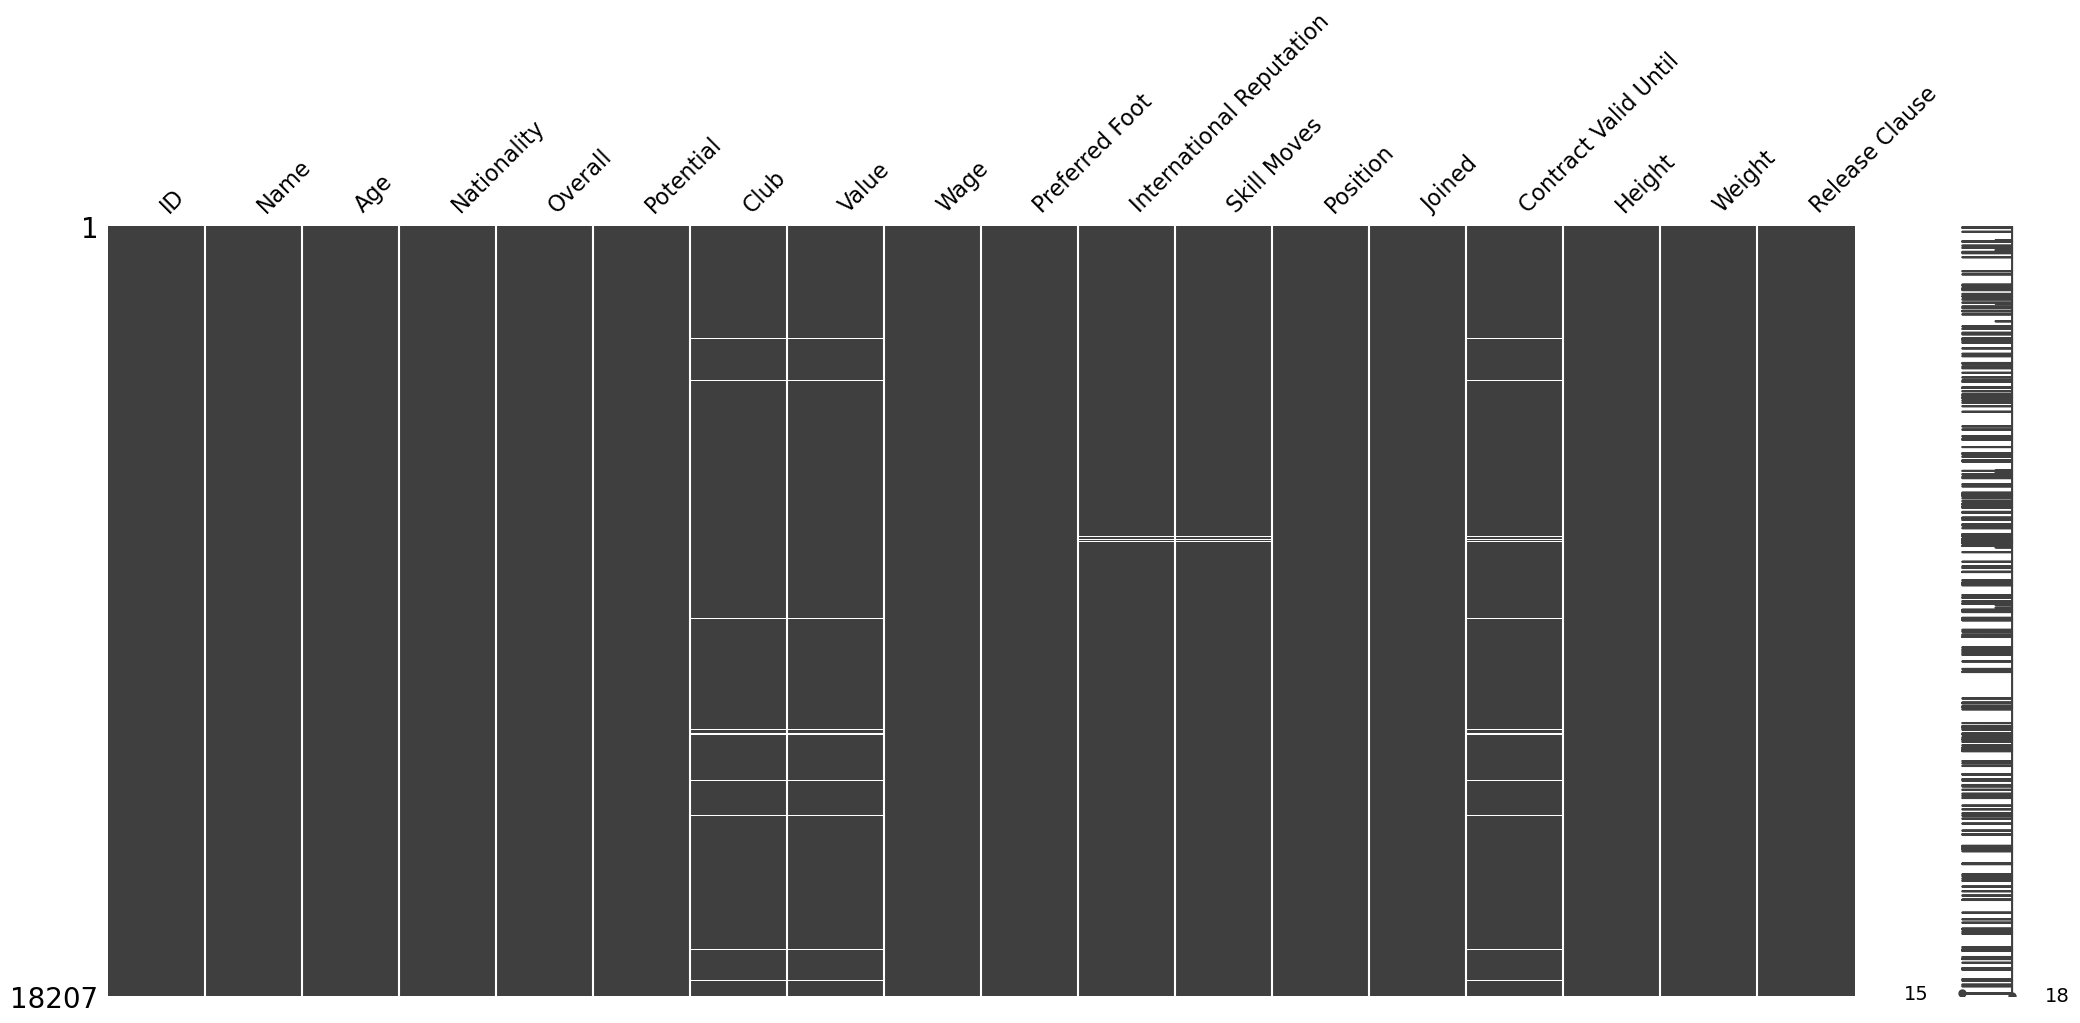

Column being sorted Joined


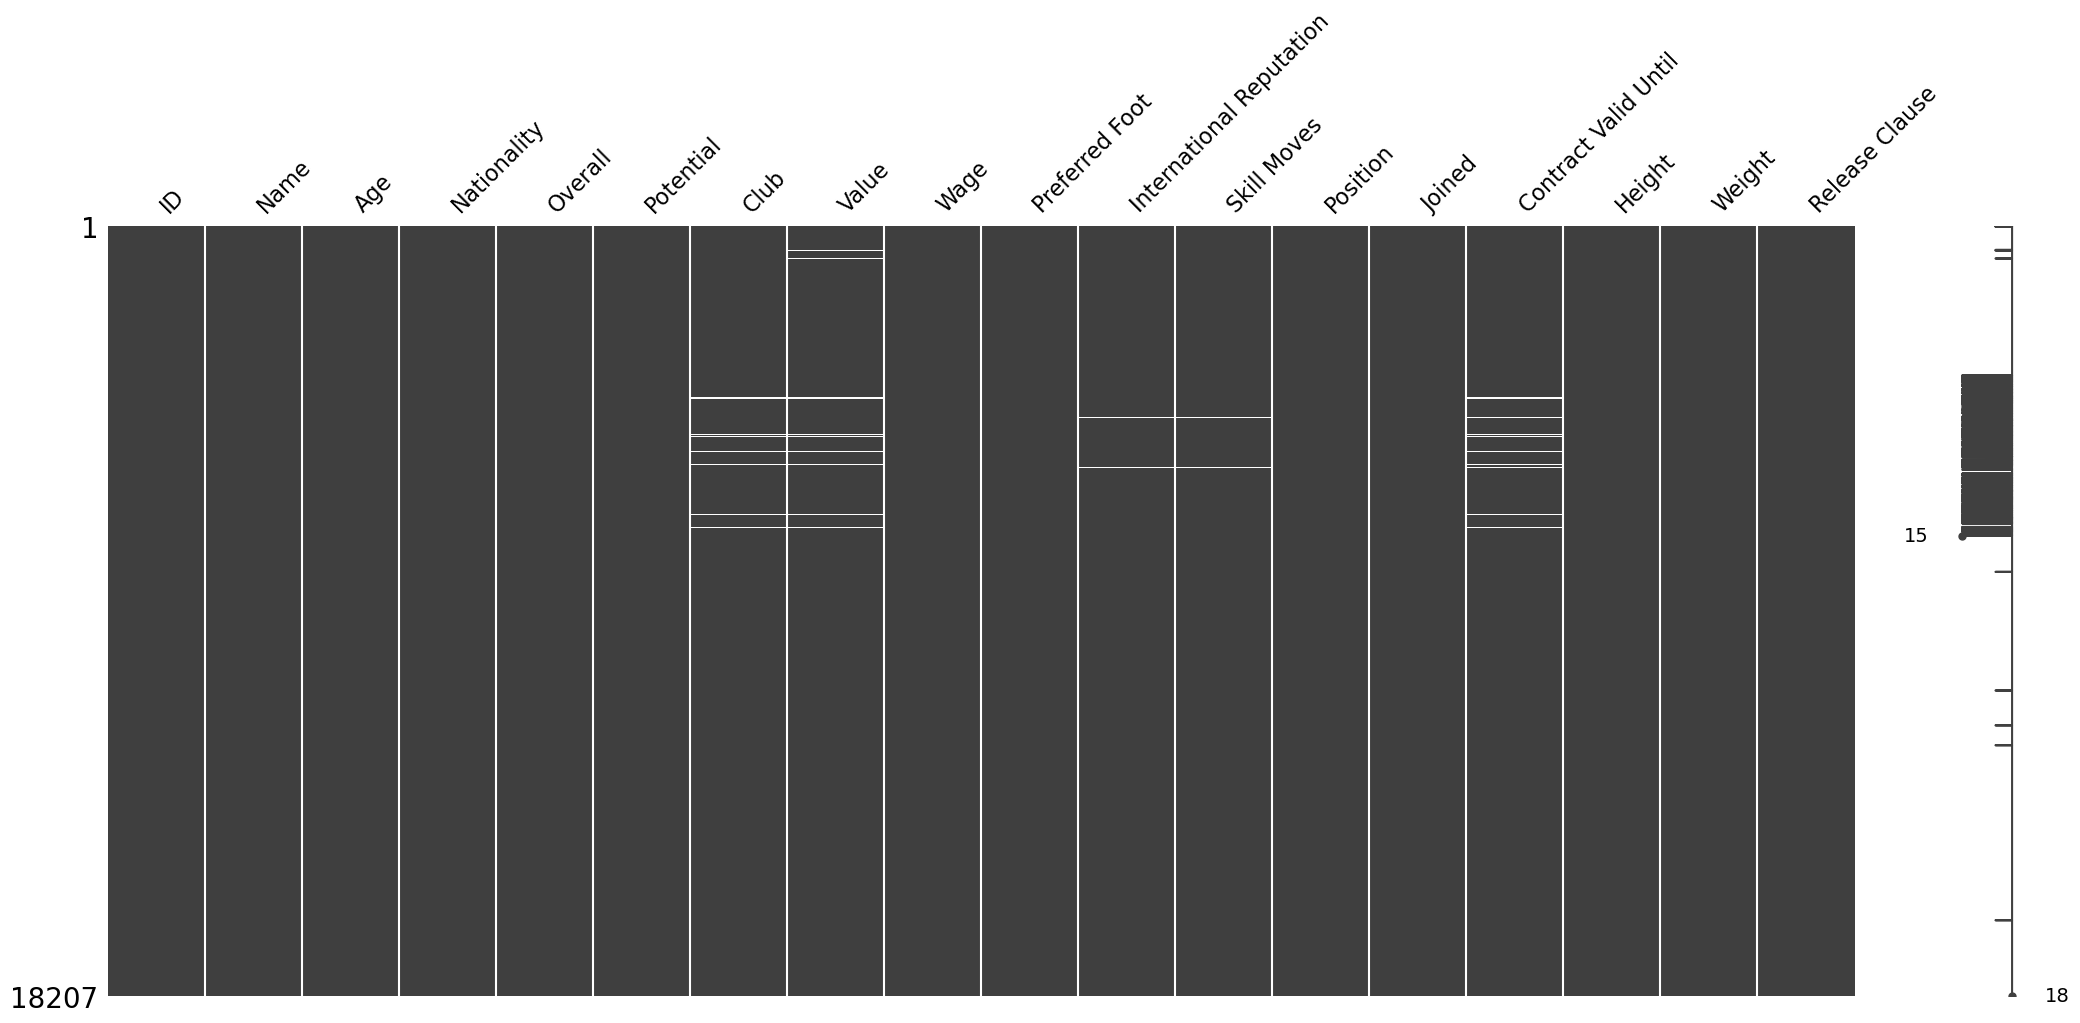

Column being sorted Contract Valid Until


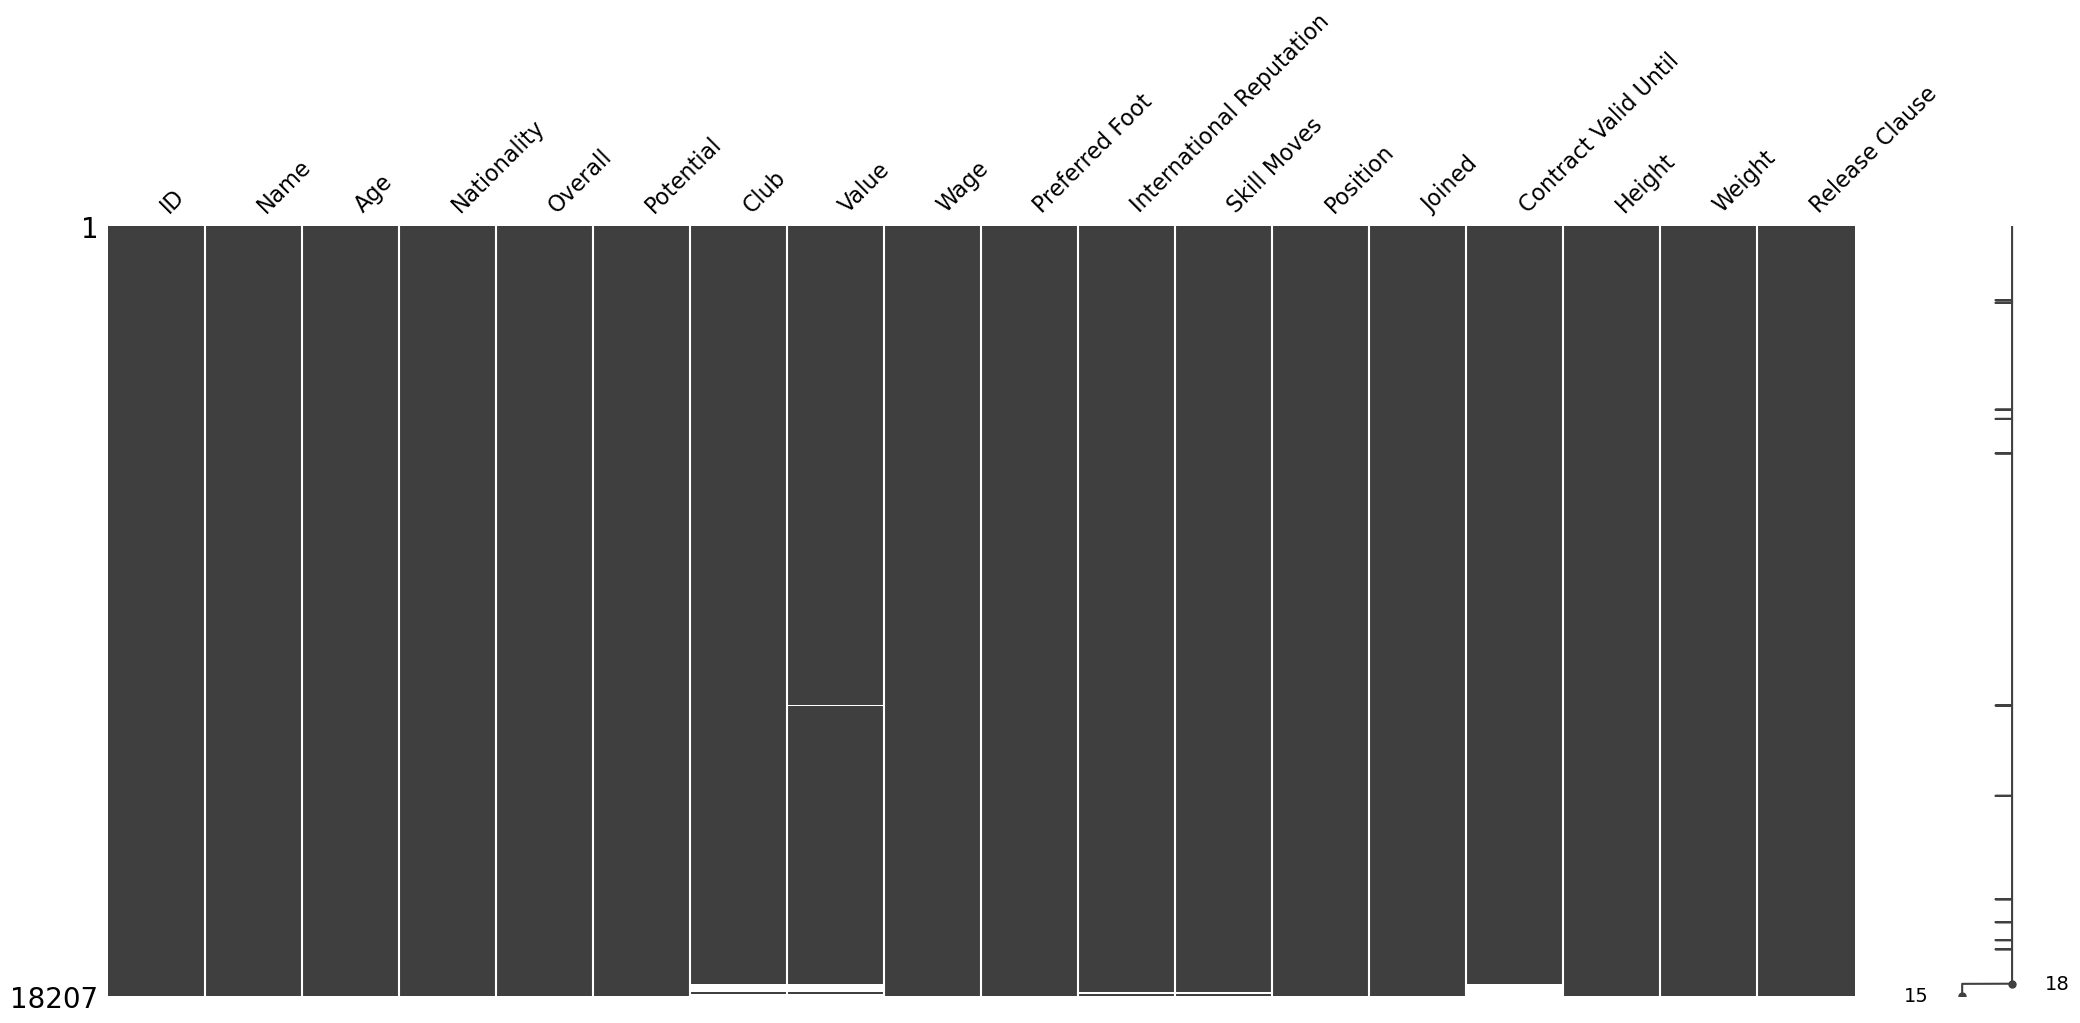

Column being sorted Height


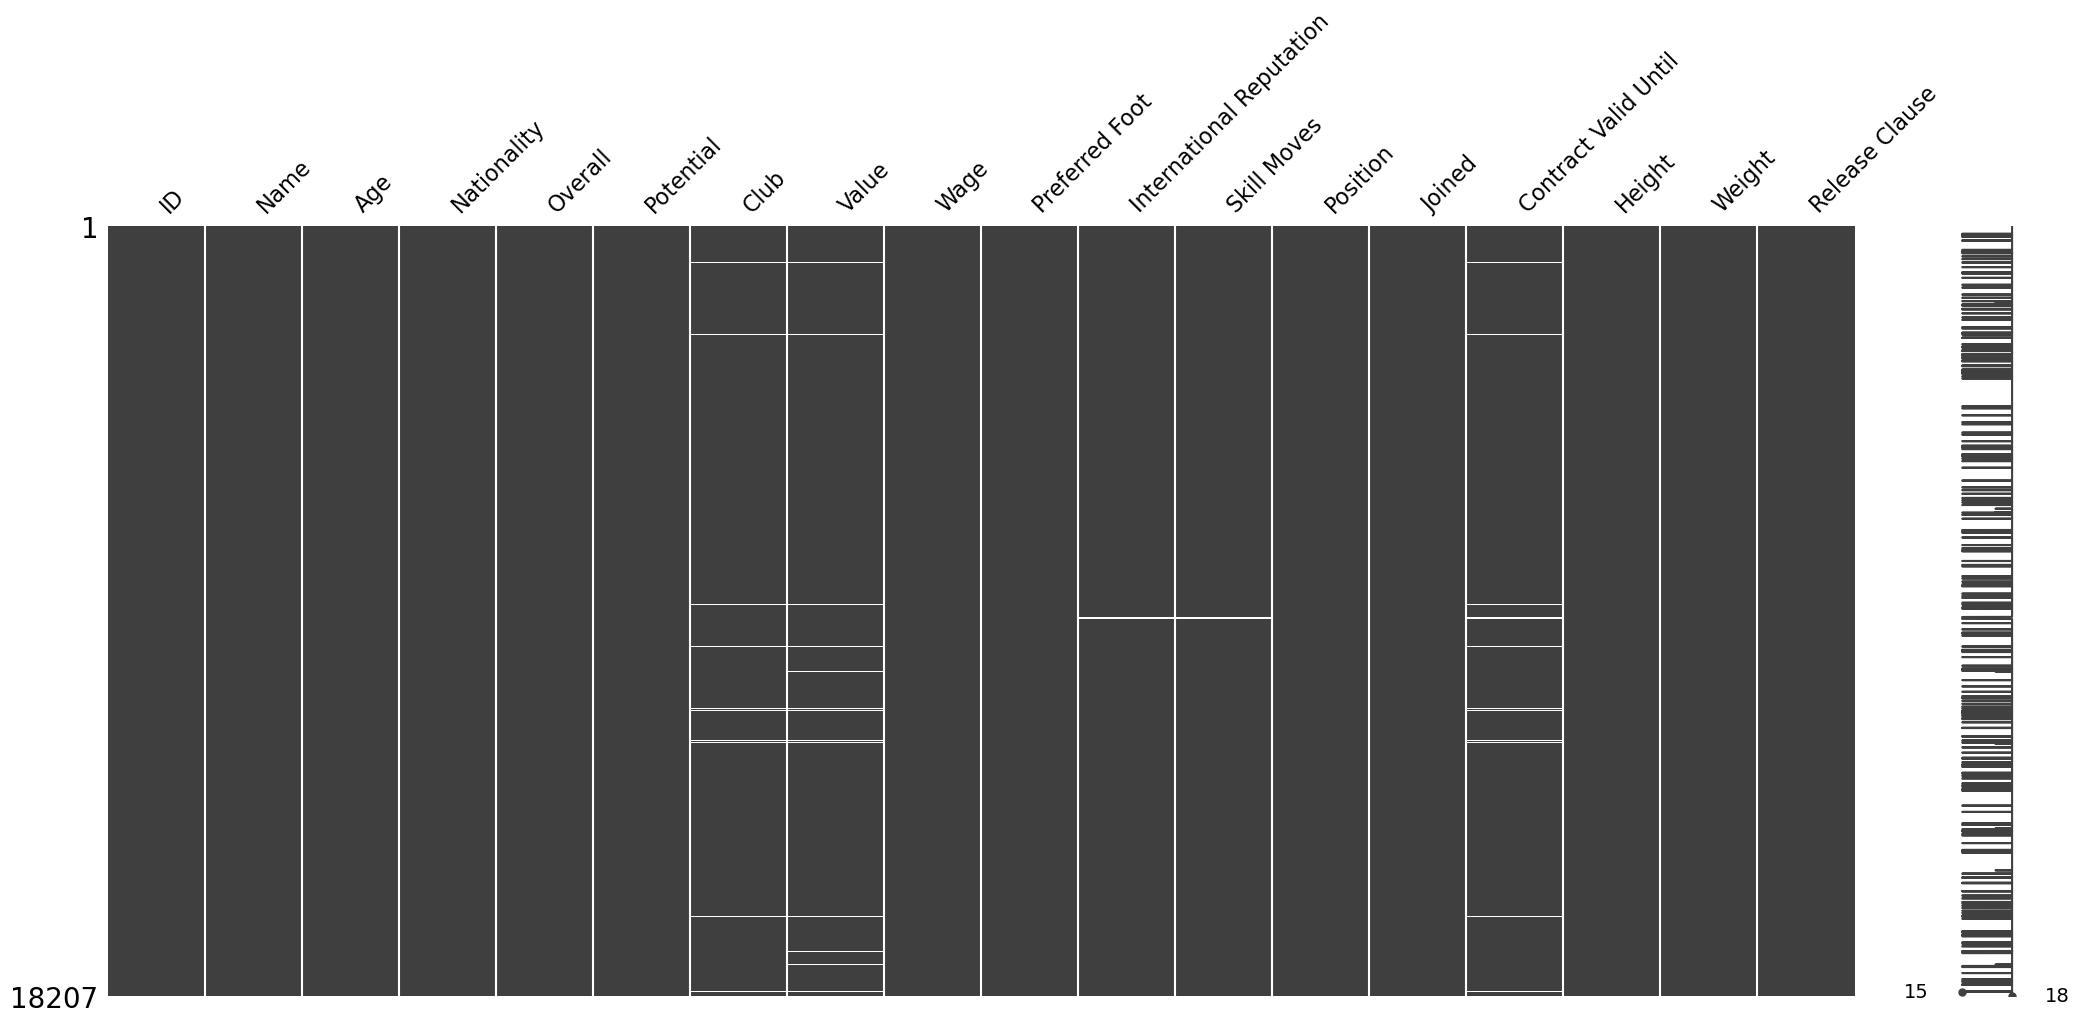

Column being sorted Weight


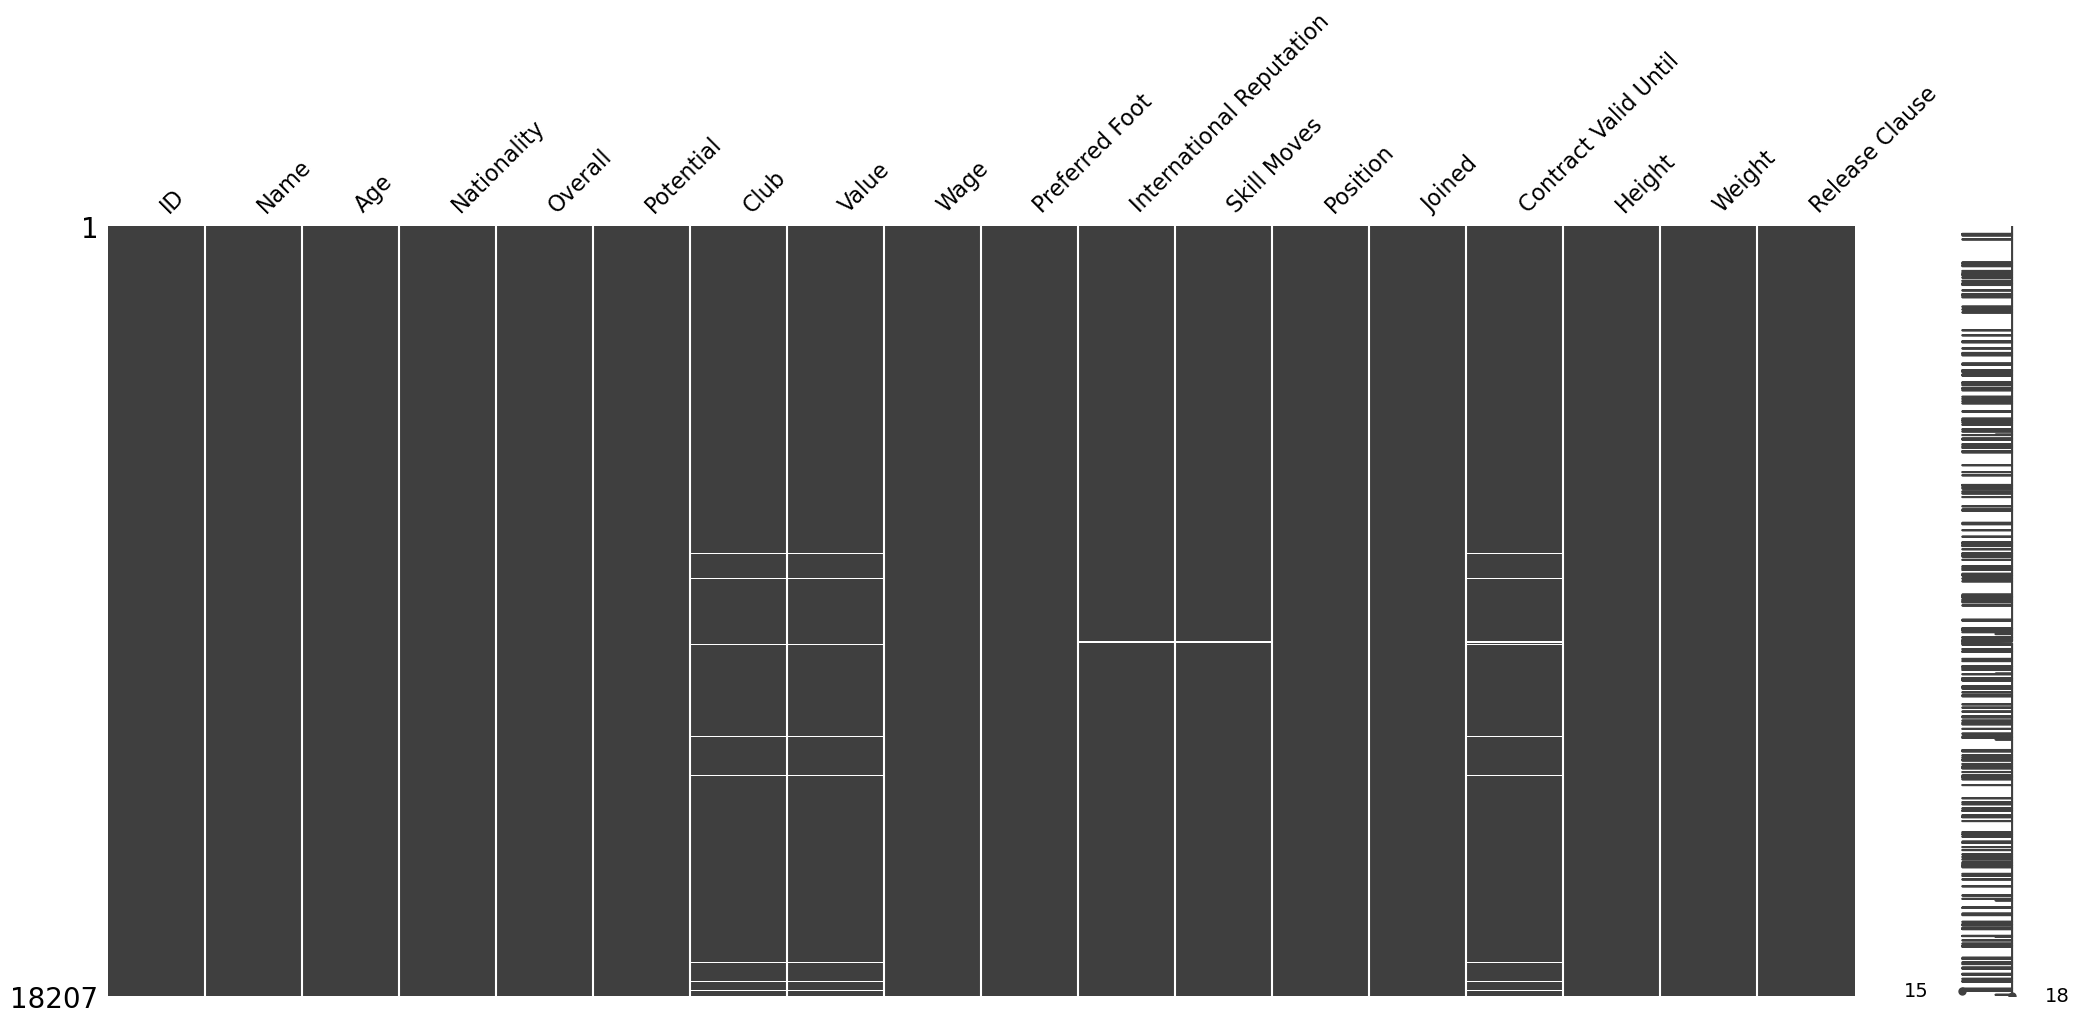

Column being sorted Release Clause


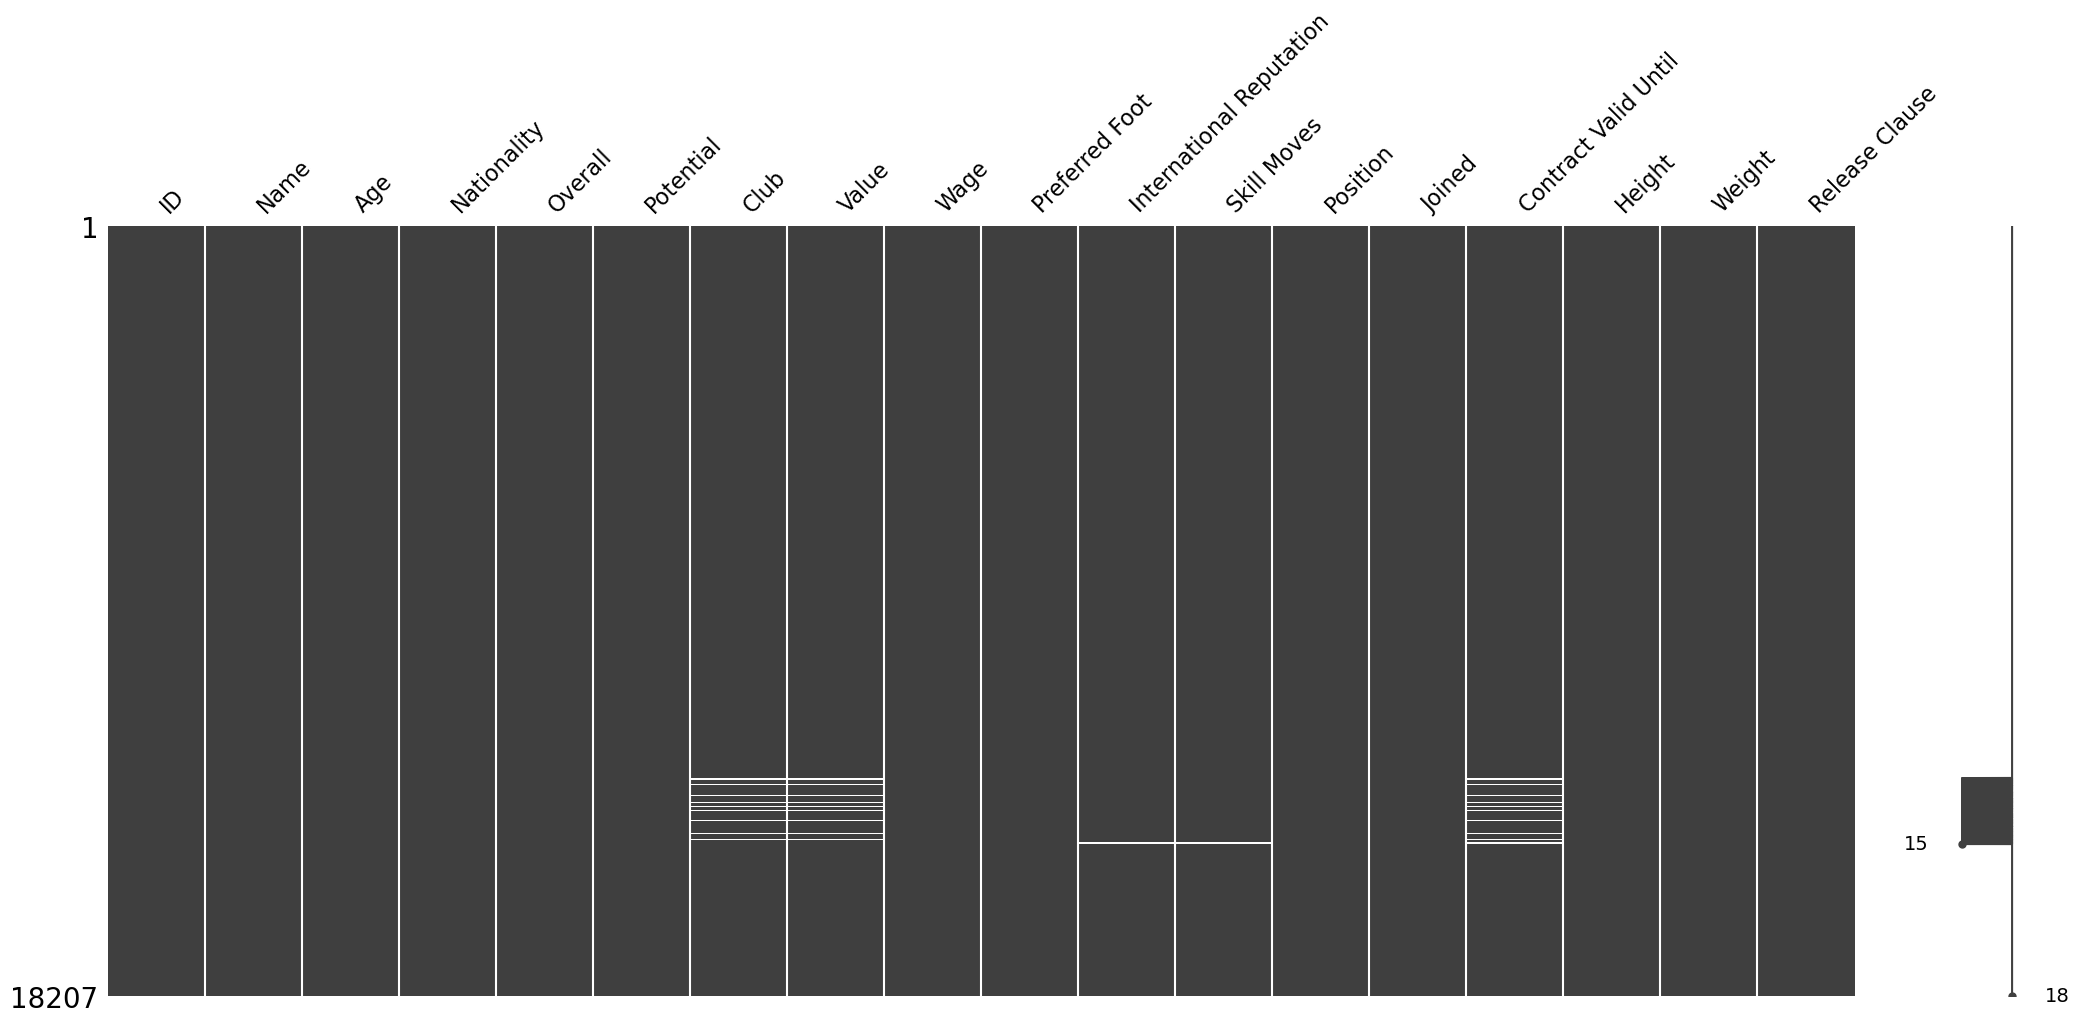

In [129]:
for i in df.columns:
    print("Column being sorted",i)
    msno.matrix(df.sort_values(by=i,ascending=True)) #Finding relation between null values and other parameters
    plt.show()

In [130]:
#Missingness can be attributed to rows which does not have a club. Therefore, missing values in club corresponds to value as well as contract valid until

In [131]:
#Since, Missing value constitute less than 2% of the total values, rows can be deleted without considering imputation techniques like KNN, mean, median 
df.dropna(subset=['Club'], inplace=True)


In [132]:
df.isnull().sum() # count the missing values in each columns

ID                           0
Name                         0
Age                          0
Nationality                  0
Overall                      0
Potential                    0
Club                         0
Value                       11
Wage                         0
Preferred Foot               0
International Reputation    48
Skill Moves                 48
Position                     0
Joined                       0
Contract Valid Until        48
Height                       0
Weight                       0
Release Clause               0
dtype: int64

In [133]:
for i in df.columns:
    df.dropna(subset=i, inplace=True)

In [134]:
df.isnull().sum()

ID                          0
Name                        0
Age                         0
Nationality                 0
Overall                     0
Potential                   0
Club                        0
Value                       0
Wage                        0
Preferred Foot              0
International Reputation    0
Skill Moves                 0
Position                    0
Joined                      0
Contract Valid Until        0
Height                      0
Weight                      0
Release Clause              0
dtype: int64

In [135]:
df.describe()

ID           Age       Overall     Potential          Value  \
count   17907.000000  17907.000000  17907.000000  17907.000000   17907.000000   
mean   214286.938795     25.095605     66.239571     71.335232    2450.132909   
std     29885.734201      4.660388      6.926818      6.137251    5633.206685   
min        16.000000     16.000000     46.000000     48.000000      10.000000   
25%    200257.500000     21.000000     62.000000     67.000000     325.000000   
50%    221710.000000     25.000000     66.000000     71.000000     700.000000   
75%    236512.500000     28.000000     71.000000     75.000000    2100.000000   
max    246620.000000     45.000000     94.000000     95.000000  118500.000000   

               Wage  International Reputation   Skill Moves        Joined  \
count  17907.000000              17907.000000  17907.000000  17907.000000   
mean       9.887753                  1.113699      2.363042   2016.429553   
std       22.148656                  0.395193      0.756256      2.027399   
min        1.000000                  1.000000      1.000000   1991.000000   
25%        1.000000                  1.000000      2.000000   2016.000000   
50%        3.000000                  1.000000      2.000000   2017.000000   
75%        9.000000                  1.000000      3.000000   2018.000000   
max      565.000000                  5.000000      5.000000   2018.000000   

             Height        Weight  Release Clause  
count  17907.000000  17907.000000    17907.000000  
mean       5.946711    165.964316     4585.060974  
std        0.220812     15.602524    10719.096361  
min        5.083333    110.000000       13.000000  
25%        5.750000    154.000000      563.000000  
50%        5.916667    165.000000     1300.000000  
75%        6.083333    176.000000     4585.060806  
max        6.750000    243.000000   228100.000000

In [136]:
df.median()

C:\Users\shrey\AppData\Local\Temp\ipykernel_24376\530051474.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



ID                          221710.000000
Age                             25.000000
Overall                         66.000000
Potential                       71.000000
Value                          700.000000
Wage                             3.000000
International Reputation         1.000000
Skill Moves                      2.000000
Joined                        2017.000000
Height                           5.916667
Weight                         165.000000
Release Clause                1300.000000
dtype: float64

In [137]:
df.var()

C:\Users\shrey\AppData\Local\Temp\ipykernel_24376\1568254755.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



ID                          8.931571e+08
Age                         2.171922e+01
Overall                     4.798080e+01
Potential                   3.766584e+01
Value                       3.173302e+07
Wage                        4.905630e+02
International Reputation    1.561772e-01
Skill Moves                 5.719235e-01
Joined                      4.110347e+00
Height                      4.875787e-02
Weight                      2.434387e+02
Release Clause              1.148990e+08
dtype: float64

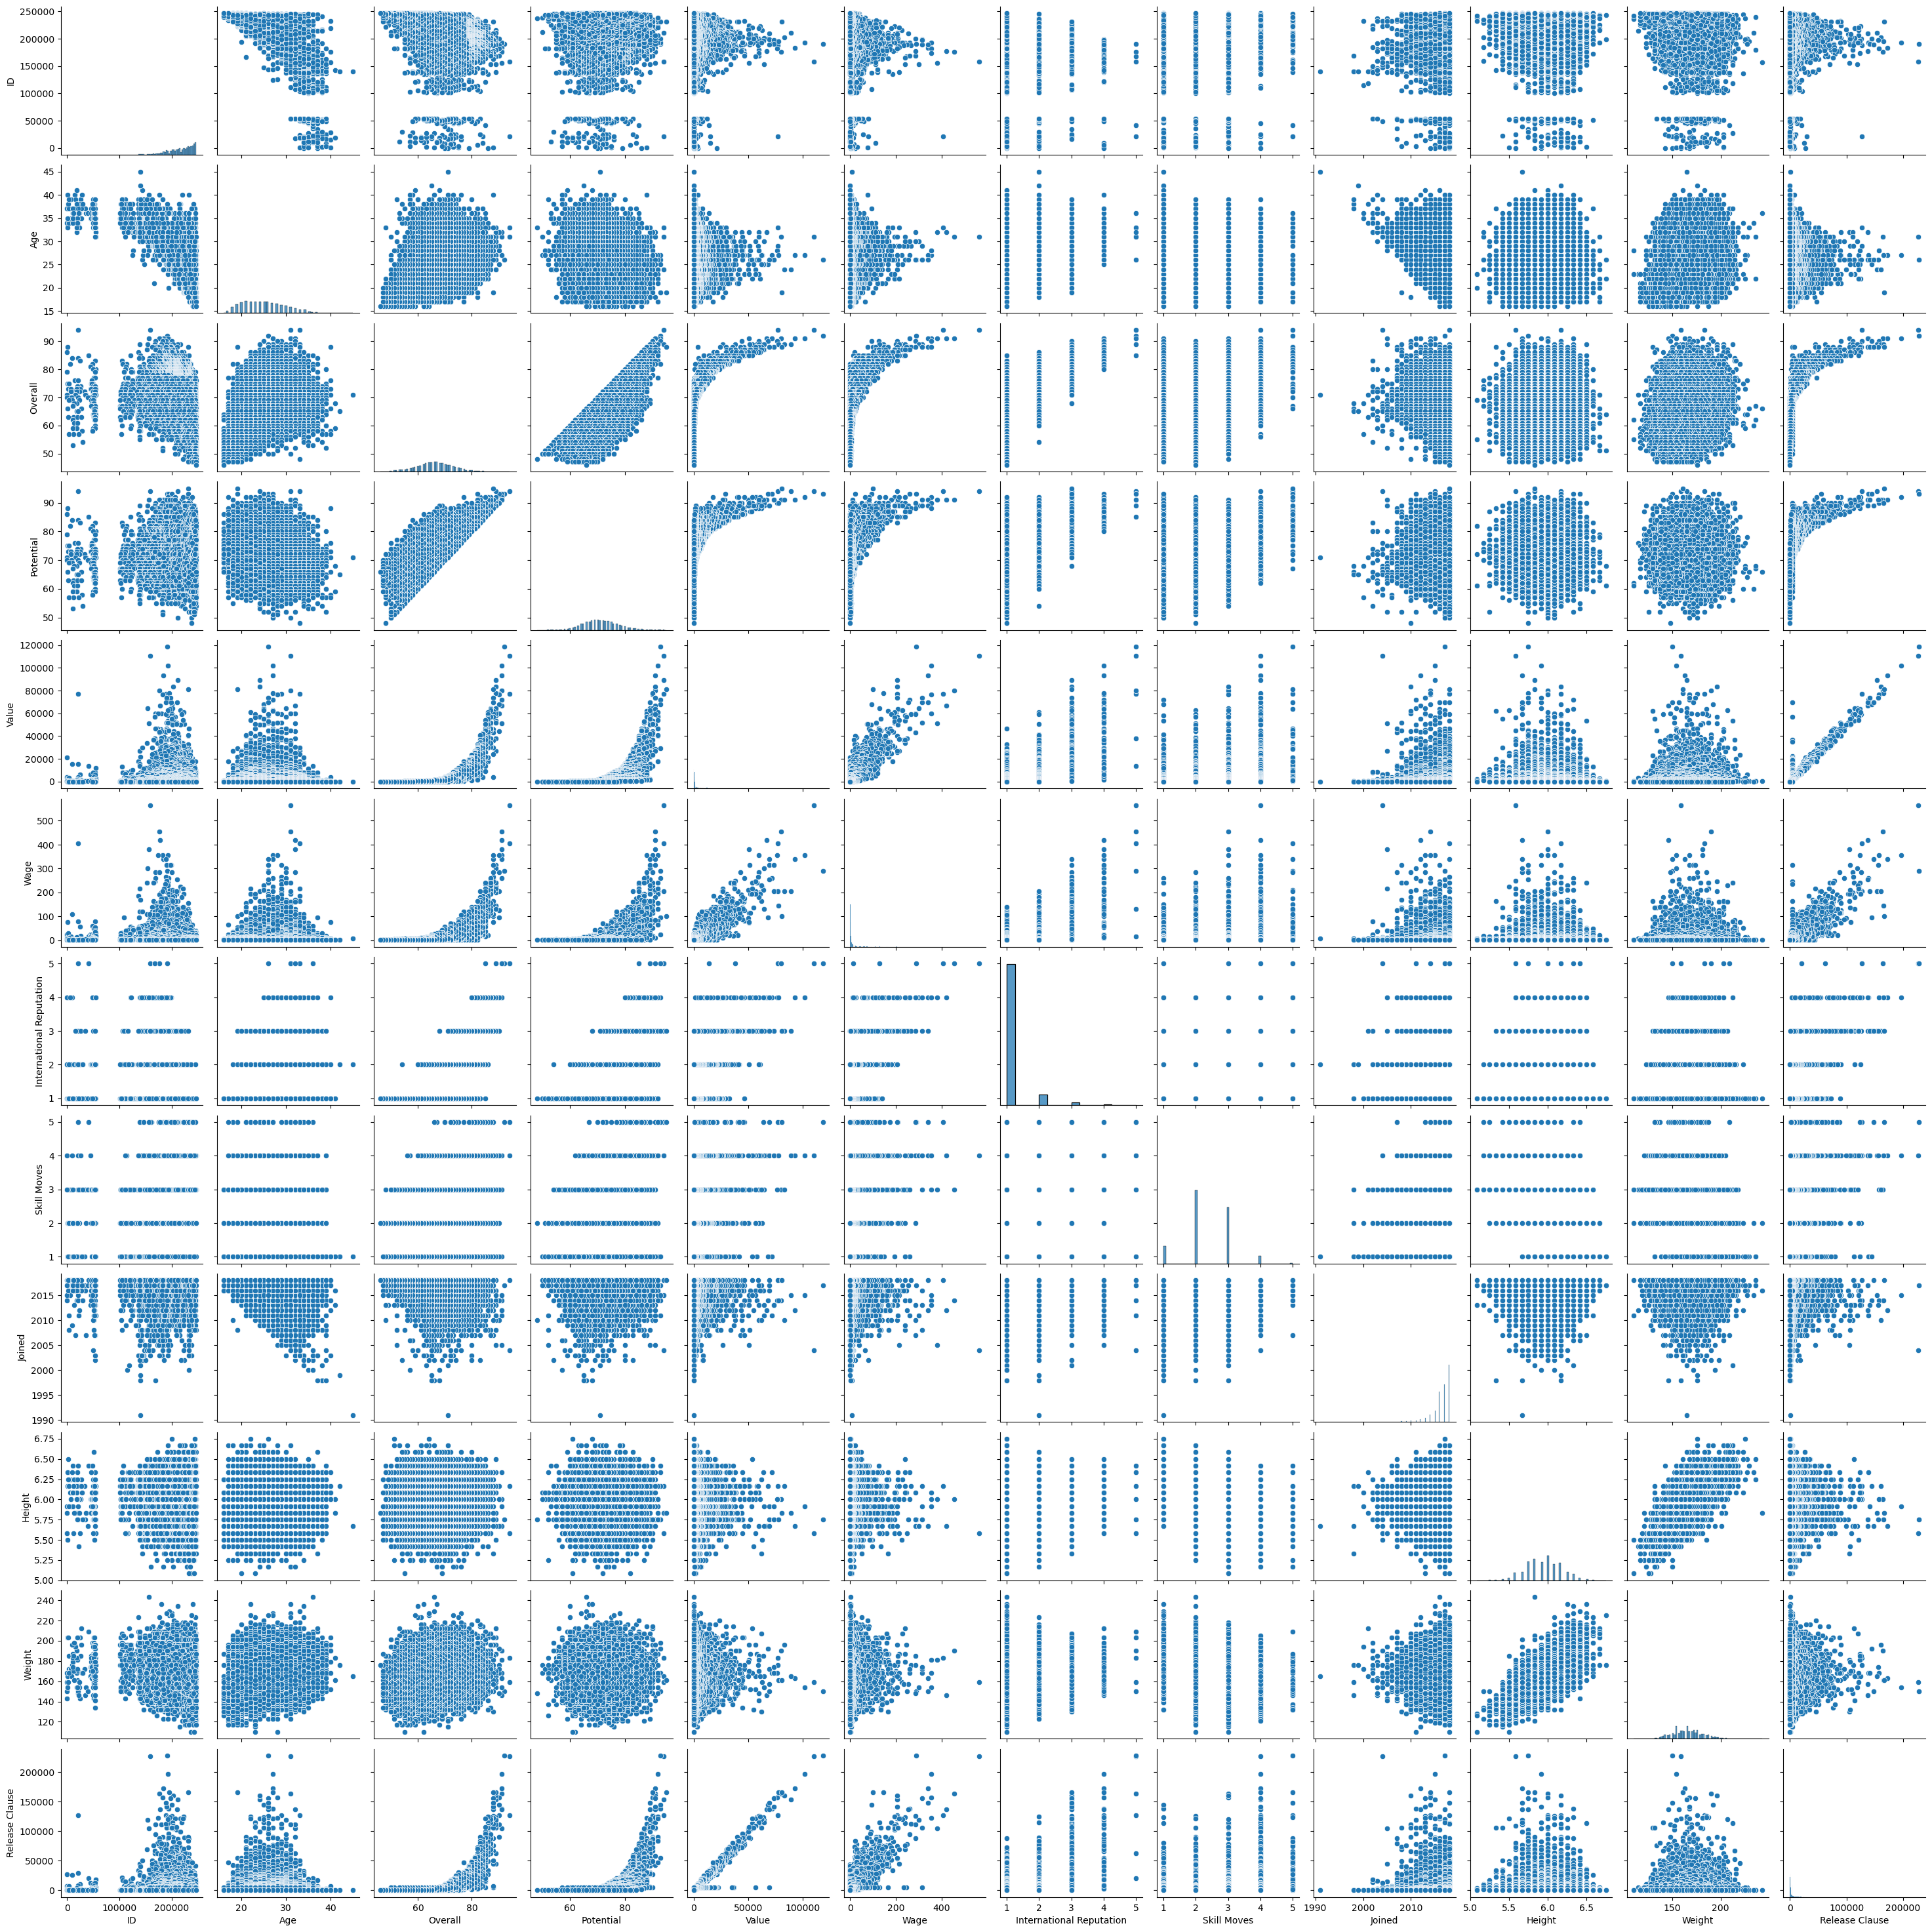

In [138]:
import seaborn as sns
sns.pairplot(df) #Pair plot between different attributes of the dataframe

<AxesSubplot:>

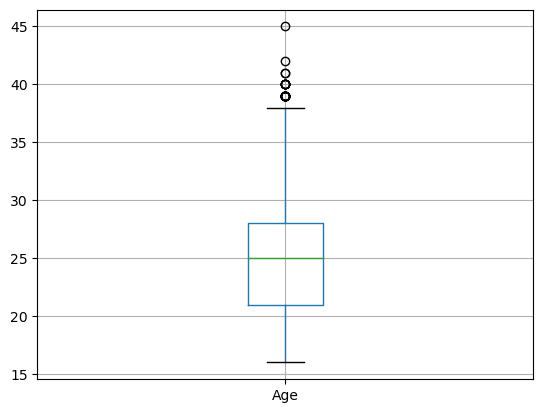

In [139]:
df.boxplot(column="Age") #It can be observed that the median age is around 25

<AxesSubplot:title={'center':'Age'}, xlabel='Skill Moves'>

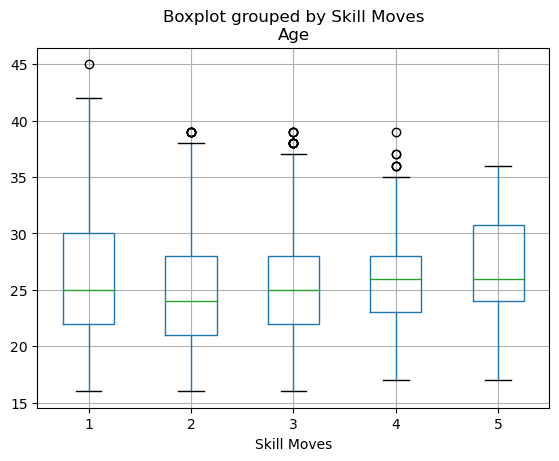

In [140]:
df.boxplot(column="Age",by="Skill Moves")
#It can be observed that the skills is not coorelated to the age in general

<AxesSubplot:title={'center':'Age'}, xlabel='International Reputation'>

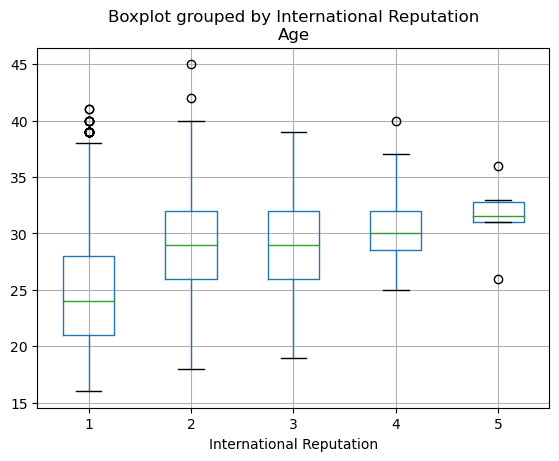

In [141]:
#It can be observed that the international reputation increase by the age
df.boxplot(column="Age",by="International Reputation")

In [142]:
#pip install dtale

In [143]:
import dtale
dtale.show(df)

#DTALE > Visualize > Describe

Binning. <br>
Create a new categorical variable by transforming a numeric variable using the pd.cut() method. <br>

In [144]:
df['Overall'].unique()

<IntegerArray>
[94, 92, 91, 90, 89, 88, 87, 86, 85, 84, 83, 82, 81, 80, 79, 78, 77, 76, 75,
 74, 73, 72, 71, 70, 69, 68, 67, 66, 65, 64, 63, 62, 61, 60, 59, 58, 57, 56,
 55, 54, 53, 52, 51, 50, 49, 48, 47, 46]
Length: 48, dtype: Int64

In [145]:
df['Grade'] = pd.cut(df.Overall, bins=[0,40,60,80,90,100],labels=['Rust','Bronze','Silver','Gold','Platinum'])

In [146]:
df[['Grade','Overall']][df['Grade']=='Platinum']

Grade  Overall
0  Platinum       94
1  Platinum       94
2  Platinum       92
3  Platinum       91
4  Platinum       91
5  Platinum       91
6  Platinum       91
7  Platinum       91
8  Platinum       91

In [147]:
df[['Grade','Overall']][df['Grade']=='Silver']

Grade  Overall
412    Silver       80
413    Silver       80
414    Silver       80
415    Silver       80
416    Silver       80
...       ...      ...
14649  Silver       61
14650  Silver       61
14651  Silver       61
14652  Silver       61
14653  Silver       61

[13981 rows x 2 columns]

<AxesSubplot:>

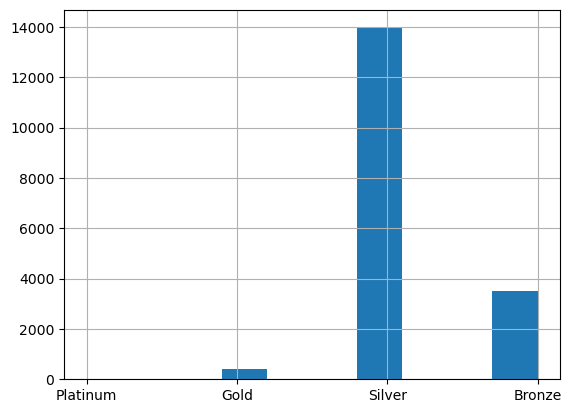

In [148]:
df['Grade'].hist()

In [149]:
#It can be observed that most of the players come in sliver category

In [150]:
df.corr()

ID       Age   Overall  Potential     Value  \
ID                        1.000000 -0.739627 -0.421406   0.044858 -0.139837   
Age                      -0.739627  1.000000  0.456619  -0.250670  0.078452   
Overall                  -0.421406  0.456619  1.000000   0.660409  0.631673   
Potential                 0.044858 -0.250670  0.660409   1.000000  0.579922   
Value                    -0.139837  0.078452  0.631673   0.579922  1.000000   
Wage                     -0.206751  0.145075  0.576098   0.489289  0.858037   
International Reputation -0.355226  0.253540  0.501429   0.374874  0.656158   
Skill Moves              -0.058608  0.029702  0.415412   0.354367  0.317246   
Joined                    0.206954 -0.201451 -0.170924  -0.049976 -0.116231   
Height                   -0.088295  0.081670  0.038778  -0.009397  0.002828   
Weight                   -0.190035  0.229674  0.154625  -0.007023  0.046711   
Release Clause           -0.122635  0.059283  0.601252   0.566967  0.973491   

                              Wage  International Reputation  Skill Moves  \
ID                       -0.206751                 -0.355226    -0.058608   
Age                       0.145075                  0.253540     0.029702   
Overall                   0.576098                  0.501429     0.415412   
Potential                 0.489289                  0.374874     0.354367   
Value                     0.858037                  0.656158     0.317246   
Wage                      1.000000                  0.671543     0.264310   
International Reputation  0.671543                  1.000000     0.208137   
Skill Moves               0.264310                  0.208137     1.000000   
Joined                   -0.144842                 -0.133103     0.020379   
Height                    0.019940                  0.035091    -0.422440   
Weight                    0.065684                  0.088704    -0.350797   
Release Clause            0.829438                  0.623378     0.299520   

                            Joined    Height    Weight  Release Clause  
ID                        0.206954 -0.088295 -0.190035       -0.122635  
Age                      -0.201451  0.081670  0.229674        0.059283  
Overall                  -0.170924  0.038778  0.154625        0.601252  
Potential                -0.049976 -0.009397 -0.007023        0.566967  
Value                    -0.116231  0.002828  0.046711        0.973491  
Wage                     -0.144842  0.019940  0.065684        0.829438  
International Reputation -0.133103  0.035091  0.088704        0.623378  
Skill Moves               0.020379 -0.422440 -0.350797        0.299520  
Joined                    1.000000  0.002192 -0.027080       -0.115808  
Height                    0.002192  1.000000  0.754225        0.001848  
Weight                   -0.027080  0.754225  1.000000        0.038348  
Release Clause           -0.115808  0.001848  0.038348        1.000000

In [151]:
#Coorelation Heat Map

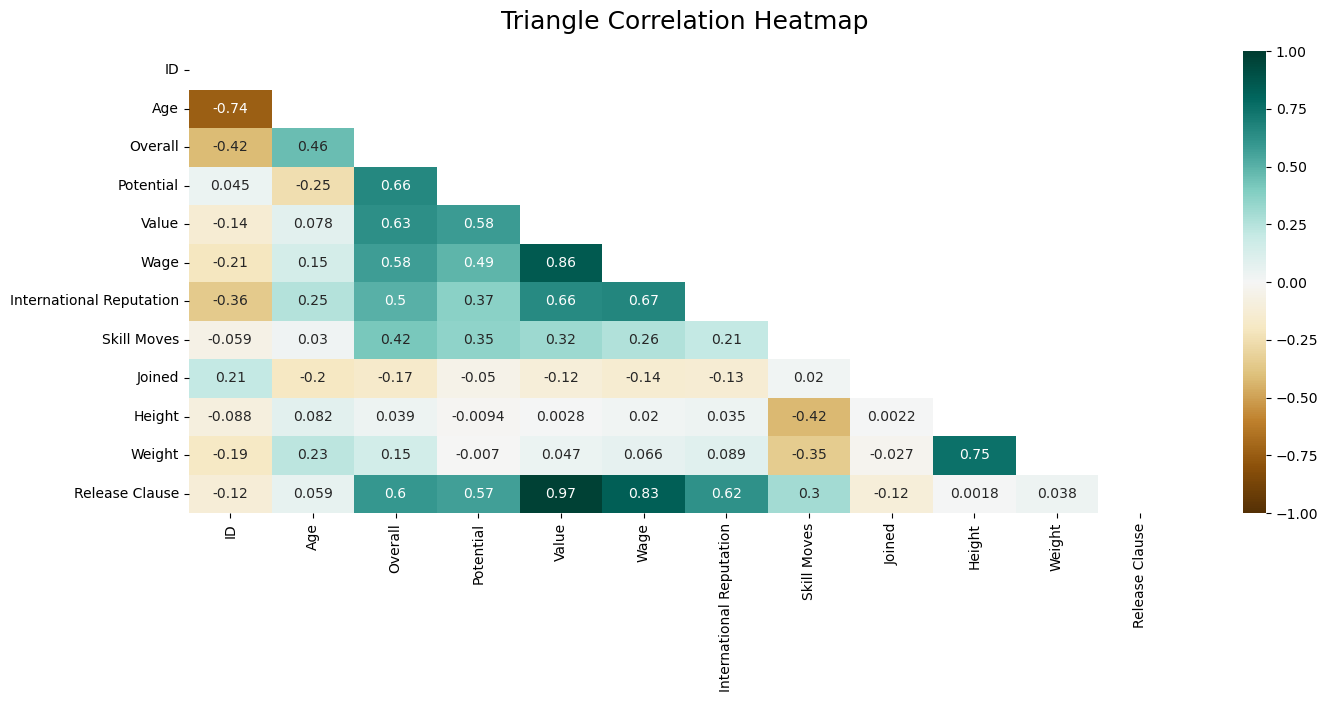

In [152]:
plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool_))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

In [153]:
#It can be observed that wage is highly coorelated to the value

C:\Users\shrey\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Position', ylabel='count'>

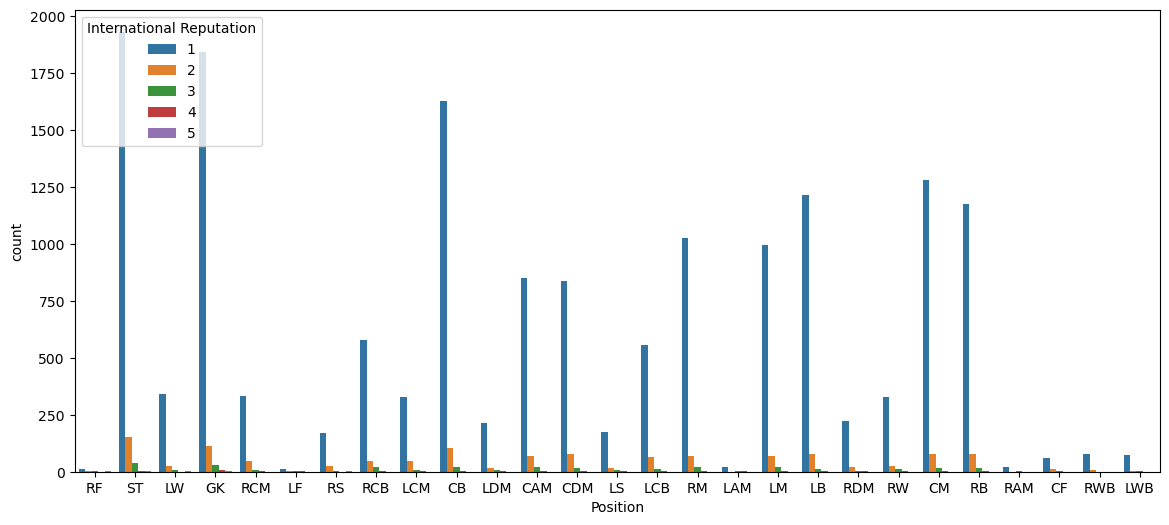

In [154]:
plt.figure(figsize=(14,6))
sns.countplot(df["Position"],hue=df["International Reputation"])

In [155]:
#It can be observed that the forward players including ST, LW, as well as the Goal Keeper fare well in the international reputations

C:\Users\shrey\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



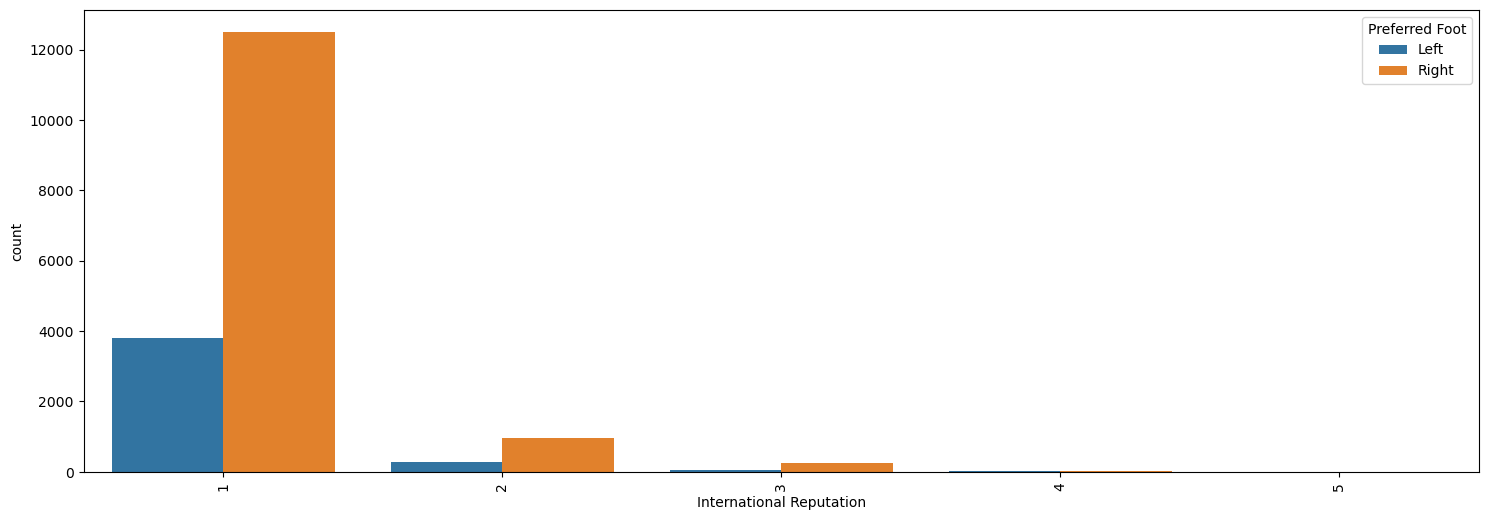

In [156]:
plt.figure(figsize=(18,6))
s=sns.countplot(df["International Reputation"],hue=df["Preferred Foot"])
plt.setp(s.get_xticklabels(), rotation=90);

In [157]:
#It can be observed that the vast majority prefer right foot

C:\Users\shrey\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='Age', ylabel='Density'>

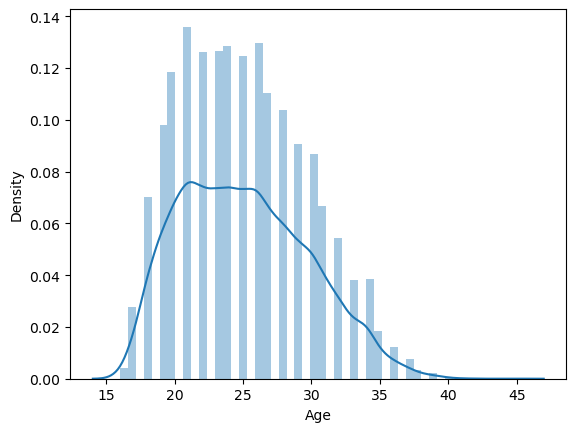

In [158]:
 
sns.distplot(df['Age'])

In [159]:
import matplotlib.pyplot as plt
df_max_wage = df.sort_values(by='Wage', ascending=False).head(100)
df_max_wage

ID               Name  Age Nationality  Overall  Potential  \
0    158023           L. Messi   31   Argentina       94         94   
7    176580          L. Suárez   31     Uruguay       91         91   
6    177003          L. Modrić   32     Croatia       91         91   
1     20801  Cristiano Ronaldo   33    Portugal       94         94   
8    155862       Sergio Ramos   32       Spain       91         91   
..      ...                ...  ...         ...      ...        ...   
283  189505              Pedro   30       Spain       82         82   
374  191740      Ander Herrera   28       Spain       81         81   
63   199556        M. Verratti   25       Italy       86         89   
113  212218         A. Laporte   24      France       84         88   
50   175943         D. Mertens   31     Belgium       87         87   

                    Club   Value  Wage Preferred Foot  \
0           FC Barcelona  110500   565           Left   
7           FC Barcelona   80000   455          Right   
6            Real Madrid   67000   420          Right   
1               Juventus   77000   405          Right   
8            Real Madrid   51000   380          Right   
..                   ...     ...   ...            ...   
283              Chelsea   21000   140          Right   
374    Manchester United   17500   140          Right   
63   Paris Saint-Germain   55000   135          Right   
113      Manchester City   34000   135           Left   
50                Napoli   45000   135          Right   

     International Reputation  Skill Moves Position  Joined  \
0                           5            4       RF    2004   
7                           5            3       RS    2014   
6                           4            4      RCM    2012   
1                           5            5       ST    2018   
8                           4            3      RCB    2005   
..                        ...          ...      ...     ...   
283                         3            4       RW    2015   
374                         3            3       CM    2014   
63                          3            4      LCM    2012   
113                         2            2      LCB    2018   
50                          3            4       RF    2013   

    Contract Valid Until    Height  Weight  Release Clause     Grade  
0             2021-01-01  5.583333   159.0        226500.0  Platinum  
7             2021-01-01       6.0   190.0        164000.0  Platinum  
6             2020-01-01  5.666667   146.0        137400.0  Platinum  
1             2022-01-01  6.166667   183.0        127100.0  Platinum  
8             2020-01-01       6.0   181.0        104600.0  Platinum  
..                   ...       ...     ...             ...       ...  
283           2020-01-01  5.583333   143.0         38900.0      Gold  
374           2019-01-01       6.0   154.0         32400.0      Gold  
63            2021-01-01  5.416667   132.0        105900.0      Gold  
113           2023-01-01  6.166667   187.0         65500.0      Gold  
50            2020-01-01  5.583333   134.0         76500.0      Gold  

[100 rows x 19 columns]

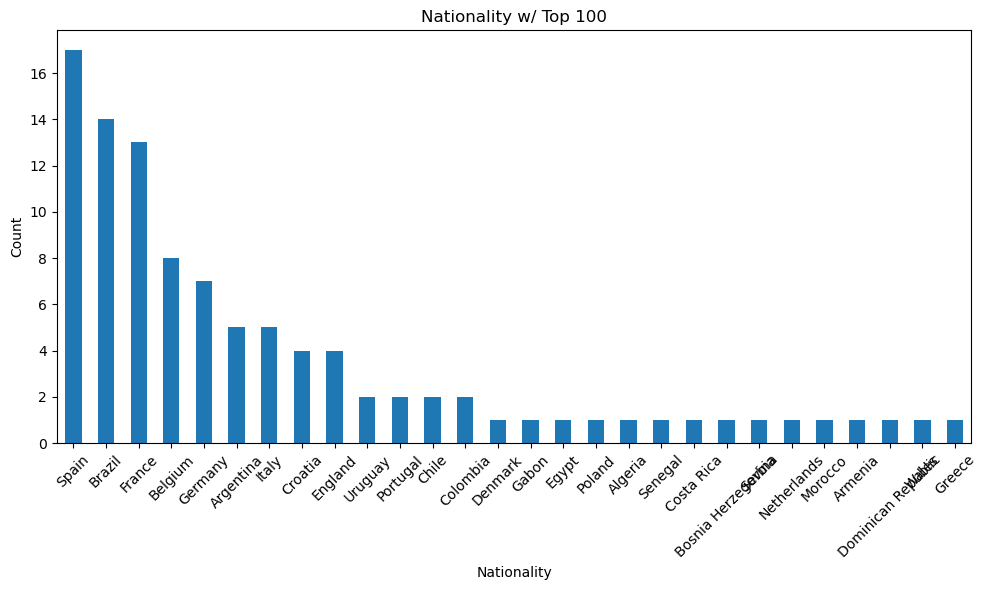

In [160]:
country_counts = df_max_wage['Nationality'].value_counts()

plt.figure(figsize=(10, 6))
country_counts.plot(kind='bar')
plt.title('Nationality w/ Top 100')
plt.xlabel('Nationality')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [161]:
#It can be observed that the players from Spain, Brazil and France are highly payed in general

## Demonstrating Machine Learning Model SVM

In [162]:
#Taking International reputation 

In [163]:
# Define the sentiment mapping
sentiment_mapping = {
    1: "Bronze",
    2: "Silver",
    3: "Gold",
    4: "Platinum",
    5: "Diamond"
}

df["International Reputation"] = df["International Reputation"].map(sentiment_mapping)
df.head(10)

ID               Name  Age Nationality  Overall  Potential  \
0  158023           L. Messi   31   Argentina       94         94   
1   20801  Cristiano Ronaldo   33    Portugal       94         94   
2  190871          Neymar Jr   26      Brazil       92         93   
3  193080             De Gea   27       Spain       91         93   
4  192985       K. De Bruyne   27     Belgium       91         92   
5  183277          E. Hazard   27     Belgium       91         91   
6  177003          L. Modrić   32     Croatia       91         91   
7  176580          L. Suárez   31     Uruguay       91         91   
8  155862       Sergio Ramos   32       Spain       91         91   
9  200389           J. Oblak   25    Slovenia       90         93   

                  Club   Value  Wage Preferred Foot International Reputation  \
0         FC Barcelona  110500   565           Left                  Diamond   
1             Juventus   77000   405          Right                  Diamond   
2  Paris Saint-Germain  118500   290          Right                  Diamond   
3    Manchester United   72000   260          Right                 Platinum   
4      Manchester City  102000   355          Right                 Platinum   
5              Chelsea   93000   340          Right                 Platinum   
6          Real Madrid   67000   420          Right                 Platinum   
7         FC Barcelona   80000   455          Right                  Diamond   
8          Real Madrid   51000   380          Right                 Platinum   
9      Atlético Madrid   68000    94          Right                     Gold   

   Skill Moves Position  Joined Contract Valid Until    Height  Weight  \
0            4       RF    2004           2021-01-01  5.583333   159.0   
1            5       ST    2018           2022-01-01  6.166667   183.0   
2            5       LW    2017           2022-01-01      5.75   150.0   
3            1       GK    2011           2020-01-01  6.333333   168.0   
4            4      RCM    2015           2023-01-01  5.916667   154.0   
5            4       LF    2012           2020-01-01  5.666667   163.0   
6            4      RCM    2012           2020-01-01  5.666667   146.0   
7            3       RS    2014           2021-01-01       6.0   190.0   
8            3      RCB    2005           2020-01-01       6.0   181.0   
9            1       GK    2014           2021-01-01  6.166667   192.0   

   Release Clause     Grade  
0        226500.0  Platinum  
1        127100.0  Platinum  
2        228100.0  Platinum  
3        138600.0  Platinum  
4        196400.0  Platinum  
5        172100.0  Platinum  
6        137400.0  Platinum  
7        164000.0  Platinum  
8        104600.0  Platinum  
9        144500.0      Gold

In [164]:
# Divide rawdf into predictor/feature set X and target set y
X = df.drop(['ID',"Name",'Nationality','Club','Preferred Foot','Position','Joined','Contract Valid Until','Release Clause','International Reputation','Grade'], axis='columns')
y = df['International Reputation']

In [165]:
X

Age  Overall  Potential   Value  Wage  Skill Moves    Height  Weight
0       31       94         94  110500   565            4  5.583333   159.0
1       33       94         94   77000   405            5  6.166667   183.0
2       26       92         93  118500   290            5      5.75   150.0
3       27       91         93   72000   260            1  6.333333   168.0
4       27       91         92  102000   355            4  5.916667   154.0
...    ...      ...        ...     ...   ...          ...       ...     ...
18202   19       47         65      60     1            2      5.75   134.0
18203   19       47         63      60     1            2      6.25   170.0
18204   16       47         67      60     1            2  5.666667   148.0
18205   17       47         66      60     1            2  5.833333   154.0
18206   16       46         66      60     1            2  5.833333   176.0

[17907 rows x 8 columns]

In [166]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
print('X_train.index:', X_train.index, '\ny_train.index:', y_train.index)
print('X_test.index:', X_test.index, '\ny_test.index:', y_test.index)
# print('X_train:\n', X_train, '\ny_train\n', y_train)
# print('X_test:\n', X_test, '\ny_test\n', y_test)

X_train.index: Int64Index([15878,  8065,  2487,  3244, 12476,  1951,  5223, 14841, 16964,
             1226,
            ...
            11165,  7885, 16616,   144,  7949, 11131, 17585,  5273, 12363,
              235],
           dtype='int64', length=11997) 
y_train.index: Int64Index([15878,  8065,  2487,  3244, 12476,  1951,  5223, 14841, 16964,
             1226,
            ...
            11165,  7885, 16616,   144,  7949, 11131, 17585,  5273, 12363,
              235],
           dtype='int64', length=11997)
X_test.index: Int64Index([ 2068,  4453,   817,  8380, 11197, 16463,  7706, 15773, 10881,
             4482,
            ...
            14685,  7338, 11222, 16406,  4988, 15579, 14238,   430, 17926,
            18188],
           dtype='int64', length=5910) 
y_test.index: Int64Index([ 2068,  4453,   817,  8380, 11197, 16463,  7706, 15773, 10881,
             4482,
            ...
            14685,  7338, 11222, 16406,  4988, 15579, 14238,   430, 17926,
            18188],
 

In [167]:
# Normalize numeric features in X_train and X_test
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

In [168]:
print('min values:', scaler.data_min_, '; max values:', scaler.data_max_)

min values: [ 16.          46.          50.          10.           1.
   1.           5.08333333 110.        ] ; max values: [4.500e+01 9.400e+01 9.500e+01 1.185e+05 4.550e+02 5.000e+00 6.750e+00
 2.360e+02]


In [169]:
def print_df_with_rawindex(dfname, raw_index, transformed_df):   # dtypes (string, int, df)
    index_df = pd.DataFrame(raw_index, columns=['rawindex'])
    print(dfname)
    print(pd.concat([index_df, transformed_df], axis='columns'))
    
X_train_normary = scaler.transform(X_train)
X_train_norm = pd.DataFrame(data=X_train_normary, columns=X_train.columns)
print_df_with_rawindex('X_train_norm', X_train.index, X_train_norm)
X_test_normary = scaler.transform(X_test)
X_test_norm = pd.DataFrame(data=X_test_normary, columns=X_train.columns)
print_df_with_rawindex('X_test_norm', X_test.index, X_test_norm)

X_train_norm
       rawindex       Age   Overall  Potential     Value      Wage  \
0         15878  0.241379  0.250000   0.333333  0.001013  0.000000   
1          8065  0.172414  0.437500   0.577778  0.008355  0.006608   
2          2487  0.517241  0.583333   0.533333  0.040425  0.015419   
3          3244  0.655172  0.541667   0.488889  0.006034  0.002203   
4         12476  0.241379  0.354167   0.466667  0.003924  0.002203   
...         ...       ...       ...        ...       ...       ...   
11992     11131  0.137931  0.375000   0.555556  0.005612  0.000000   
11993     17585  0.172414  0.145833   0.288889  0.000675  0.000000   
11994      5273  0.206897  0.500000   0.600000  0.021014  0.017621   
11995     12363  0.275862  0.354167   0.422222  0.003502  0.002203   
11996       235  0.206897  0.750000   0.822222  0.210904  0.213656   

       Skill Moves  Height    Weight  
0             0.00    0.80  0.476190  
1             0.25    0.70  0.547619  
2             0.50    0.45  0

In [170]:
from sklearn.svm import SVC
svc = SVC(C=1, kernel='linear')
svc.fit(X_train_norm, y_train)

SVC(C=1, kernel='linear')

In [171]:
print('Actual:    ', y_test.to_numpy()) # without .to_numpy(), y_test is printed in a column
print('Predicted: ', svc.predict(X_test_norm))

Actual:     ['Bronze' 'Bronze' 'Silver' ... 'Bronze' 'Bronze' 'Bronze']
Predicted:  ['Bronze' 'Bronze' 'Bronze' ... 'Silver' 'Bronze' 'Bronze']


In [172]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

y_test_pred_svc = svc.predict(X_test_norm)

# Classification Report
print(classification_report(y_test_pred_svc, y_test))

              precision    recall  f1-score   support

      Bronze       0.99      0.95      0.97      5640
     Diamond       0.00      0.00      0.00         0
        Gold       0.30      0.56      0.39        48
    Platinum       0.00      0.00      0.00         0
      Silver       0.29      0.53      0.38       222

    accuracy                           0.93      5910
   macro avg       0.32      0.41      0.35      5910
weighted avg       0.96      0.93      0.94      5910



C:\Users\shrey\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

C:\Users\shrey\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

C:\Users\shrey\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



In [173]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

print('\nSupport Vector Classification testing results:\n' + 'Accuracy:', metrics.accuracy_score(y_test, y_test_pred_svc))


Support Vector Classification testing results:
Accuracy: 0.9292724196277495


In [174]:
#Higher accuracy due to skewed dataset. Can be resolved using SMOTE sampling or other techniques 